In [1]:
#Import statements for various libraries
import pandas as pd #Pandas : To handle and manipulate dataset
import numpy as np #Numpy : To operate on arrays, here pandas Series
import matplotlib.pyplot as plt #Matplolib, Seaborn : To plot various graphs
import seaborn as sns

In [2]:
df = pd.read_csv('NDAP_REPORT_7004.csv') #Importing data from csv as pandas Dataframe

In [3]:
df #Viewing Features

Rowid Country  State lgd code  \
0         1   India               1   
1         2   India               1   
2         3   India               1   
3         4   India               1   
4         5   India               1   
...     ...     ...             ...   
1468   1469   India              38   
1469   1470   India              38   
1470   1471   India              38   
1471   1472   India              38   
1472   1473   India              38   

                                             State  District lgd code  \
0                                Jammu And Kashmir                  1   
1                                Jammu And Kashmir                  1   
2                                Jammu And Kashmir                  2   
3                                Jammu And Kashmir                  2   
4                                Jammu And Kashmir                  3   
...                                            ...                ...   
1468  The Dadra And Nagar Haveli And Daman And Diu                463   
1469  The Dadra And Nagar Haveli And Daman And Diu                464   
1470  The Dadra And Nagar Haveli And Daman And Diu                464   
1471  The Dadra And Nagar Haveli And Daman And Diu                465   
1472  The Dadra And Nagar Haveli And Daman And Diu                465   

                    District  Year Type of residence namely rural or urban  \
0                   Anantnag  2011                                   Rural   
1                   Anantnag  2011                                   Urban   
2                     Budgam  2011                                   Rural   
3                     Budgam  2011                                   Urban   
4                  Baramulla  2011                                   Rural   
...                      ...   ...                                     ...   
1468                   Daman  2011                                   Urban   
1469                     Diu  2011                                   Rural   
1470                     Diu  2011                                   Urban   
1471  Dadra And Nagar Haveli  2011                                   Rural   
1472  Dadra And Nagar Haveli  2011                                   Urban   

     Number of census houses  \
0                     109465   
1                      33522   
2                85561.57321   
3                      13136   
4                120312.4268   
...                      ...   
1468                   42352   
1469                    5410   
1470                    5279   
1471                   35408   
1472                   37655   

     Houses having grass or thatch or bamboo etc. as material of wall  \
0                                                   270                 
1                                                    69                 
2                                           134.1822704                 
3                                                    49                 
4                                           410.8177296                 
...                                                 ...                 
1468                                                202                 
1469                                                  6                 
1470                                                 11                 
1471                                              16428                 
1472                                               2156                 

     Houses having plastic or polythene as material of wall  \
0                                                  1331       
1                                                   121       
2                                           168.9702664       
3                                                    27       
4                                           173.0297336       
...                                                 ...       
1468                

In [4]:
nrows = df.shape[0] #shape returns a tuple (rows, column) with dimensions of dataframe
ncols = df.shape[1]
print ('Rows : ' + str(nrows) + "\n" + "Columns : " + str(ncols)) #printing results 


Rows : 1473
Columns : 19


In [5]:
#pd.unique() returns list of unique values and we take its length
#df.columns.values is a list of column names in dataframe
print('Unique Value Counts of Columns\n')
for col in df.columns.values:
    unq = len(pd.unique(df[col]))
    print(str(unq) + "\t" + col)

Unique Value Counts of Columns

1473	Rowid
1	Country
36	State lgd code
36	State
737	District lgd code
732	District
1	Year
2	Type of residence namely rural or urban
1439	Number of census houses
1366	Houses having grass or thatch or bamboo etc. as material of wall
1066	Houses having plastic or polythene as material of wall
1414	Houses having mud or unburnt brick as material of wall
1090	Houses having wood as material of wall
1339	Houses having stone not packed with mortar as material of wall
1362	Houses having stone packed with mortar as material of wall
946	Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall
1434	Houses having burnt brick as material of wall
1329	Houses having concrete as material of wall
1095	Houses having any other material of wall


In [6]:
print('Column Datatypes\n')
for col in df.columns.values: #Iterating over every columns in dataframe
    print(str(df[col].dtypes) + "\t" + col) #Series.dtypes() returns its datatype 

Column Datatypes

int64	Rowid
object	Country
int64	State lgd code
object	State
int64	District lgd code
object	District
int64	Year
object	Type of residence namely rural or urban
object	Number of census houses
object	Houses having grass or thatch or bamboo etc. as material of wall
object	Houses having plastic or polythene as material of wall
float64	Houses having mud or unburnt brick as material of wall
float64	Houses having wood as material of wall
float64	Houses having stone not packed with mortar as material of wall
float64	Houses having stone packed with mortar as material of wall
float64	Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall
float64	Houses having burnt brick as material of wall
float64	Houses having concrete as material of wall
float64	Houses having any other material of wall


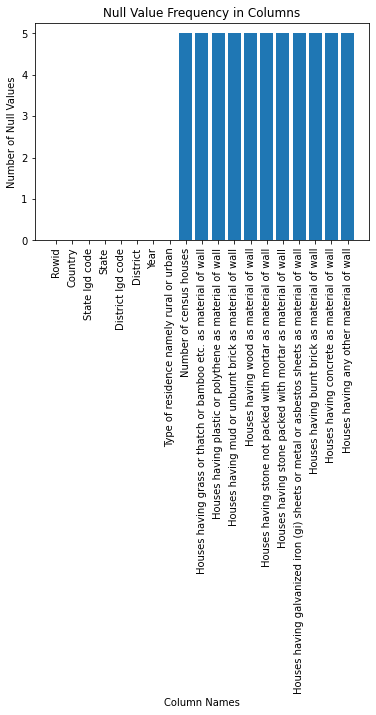

In [7]:
colnames = df.columns.values #Storing list of column names
nullcount = [] # lsit to store null count of each columns
for col in colnames:
    nullcount.append(np.sum(pd.isnull(df[col]))) 
    #pd.isnull(Series) returns a boolean list with true at places having null value 
    #np.sum returns sum of elements in passed list
    #nullcount is appended with number of null values in a given column
plt.bar(colnames, nullcount) #Plotting Bar Graph
plt.xticks(rotation=90) #Rotating labels by 90 degree
plt.xlabel('Column Names') #Giving x label
plt.ylabel('Number of Null Values') # Giving y label
plt.title('Null Value Frequency in Columns') # Giving title to graph
plt.show() #Displaying the graph

    

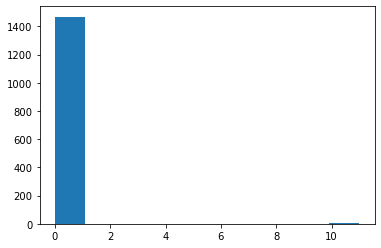

In [8]:
rownullcount= [] #To store null values of a row
for i in range(0, nrows):
    rownullcount.append(np.sum(pd.isnull(df.iloc[i]))) #Same logic as columns just rows passed as argument this time
plt.hist(rownullcount) #Plotting histogram as bar graph would be illegible
plt.show() #displaying plot



In [9]:
df[df.isna().any(axis=1)] #Viewing the null values, .isna returns dataframe with true at places having null, .any(axis=1) returns rows which had true as a value

Rowid Country  State lgd code  State  District lgd code    District  \
185    186   India               7  Delhi                 78        East   
191    192   India               7  Delhi                 81  North East   
195    196   India               7  Delhi                 83       South   
201    202   India               7  Delhi                670  South East   
203    204   India               7  Delhi                671    Shahdara   

     Year Type of residence namely rural or urban Number of census houses  \
185  2011                                   Urban                     NaN   
191  2011                                   Urban                     NaN   
195  2011                                   Urban                     NaN   
201  2011                                   Urban                     NaN   
203  2011                                   Urban                     NaN   

    Houses having grass or thatch or bamboo etc. as material of wall  \
185                                                NaN                 
191                                                NaN                 
195                                                NaN                 
201                                                NaN                 
203                                                NaN                 

    Houses having plastic or polythene as material of wall  \
185                                                NaN       
191                                                NaN       
195                                                NaN       
201                                                NaN       
203                                                NaN       

     Houses having mud or unburnt brick as material of wall  \
185                                                NaN        
191                                                NaN        
195                                                NaN        
201                                                NaN        
203                                                NaN        

     Houses having wood as material of wall  \
185                                     NaN   
191                                     NaN   
195                                     NaN   
201                                     NaN   
203                                     NaN   

     Houses having stone not packed with mortar as material of wall  \
185                                                NaN                
191                                                NaN                
195                                                NaN                
201                                                NaN                
203                                                NaN                

     Houses having stone packed with mortar as material of wall  \
185                                                NaN            
191                                                NaN            
195                                                NaN            
201                                                NaN            
203                                                NaN            

     Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall  \
185                                                NaN                                           
191                                                NaN                                           
195                                                NaN                                           
201                                                NaN                                           
203                                                NaN                                           

     Houses having burnt brick as material of wall  \
185                                            NaN   
191                                            NaN   
195                                 

In [10]:
df.dropna(inplace=True) #Dropped all null values
df.reset_index(drop=True, inplace=True) #Resetting our index after dropping null values, inplace modifies our original dataframe
#While changing datatype of columns, it was identified that some columns had 'zero' as a value instead to numeric 0.
# These values were present in columns whose numeric count was greater than 900 so that is utilized as a condition
for col in df.columns.values: #Iterating over columns
    if len(pd.unique(df[col]))>900: #Used an observation mentioned above
        df[col]= df[col].replace('zero', '0').apply(pd.to_numeric).astype('int64') #.replace changes zero with 0, .apply(pd.to_numeric) changes each data to numeric value, .astype('int64') to change dtype
        #In real life, Number of houses can't be floating so it has been converted to int
        

In [11]:
#While plotting scatterplot it was observed that a datapoint was an outlier in District Code so an arbitrary value 10000 was decided and we dropped district with code greater than that
df.drop(df[df['District lgd code'] > 10000].index, inplace=True)

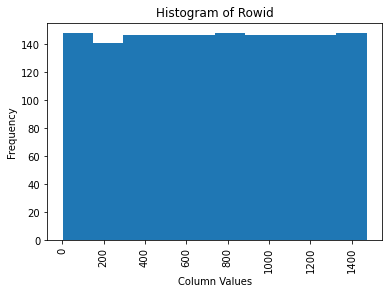

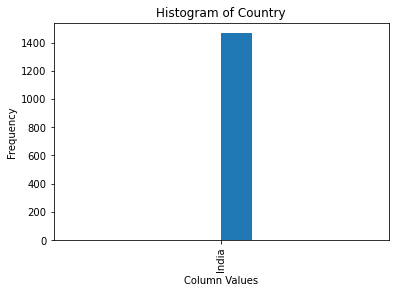

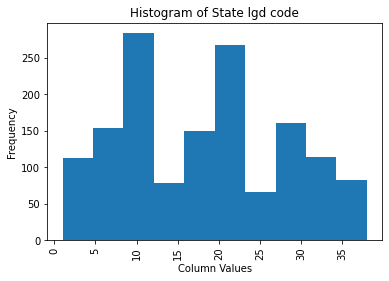

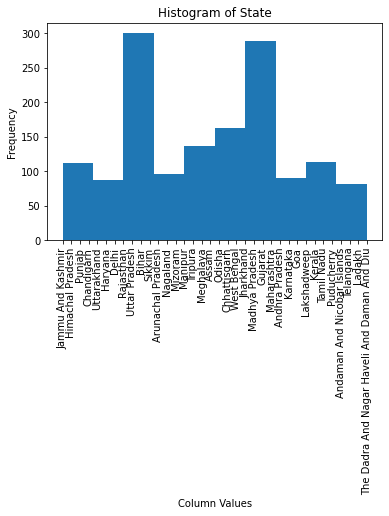

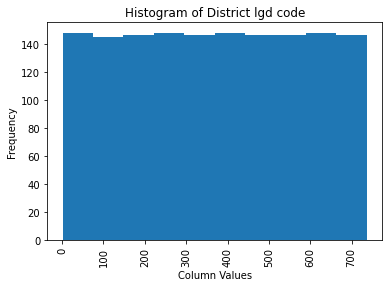

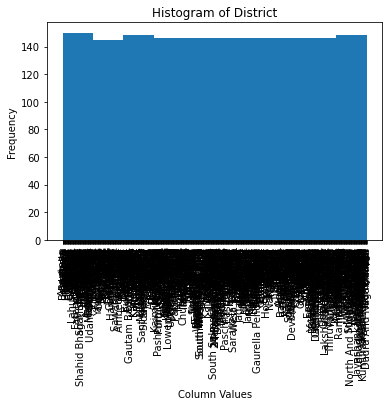

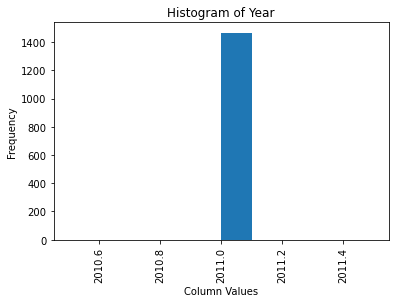

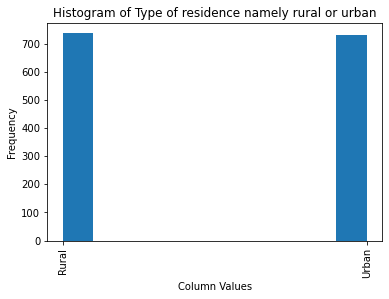

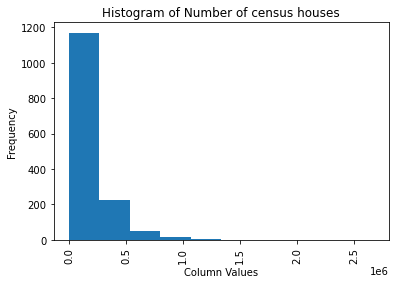

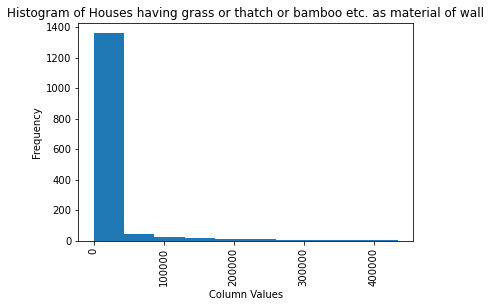

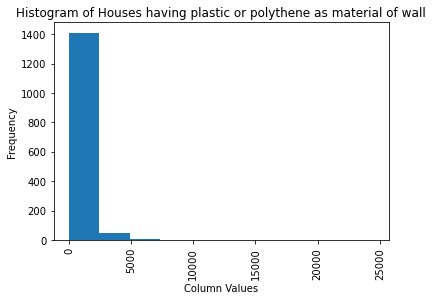

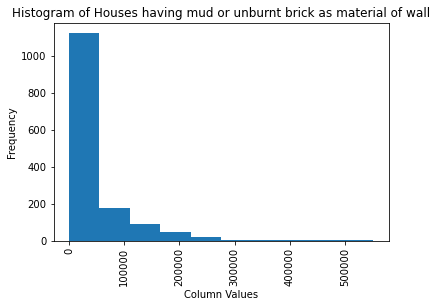

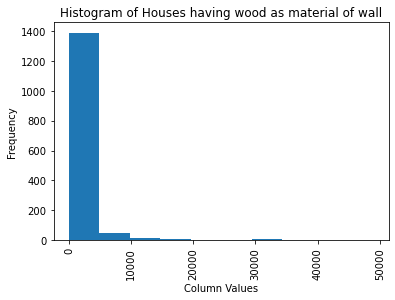

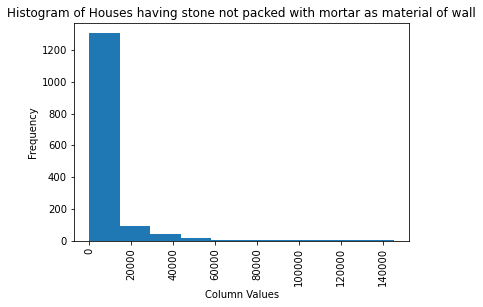

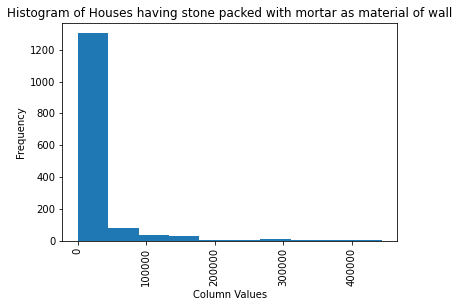

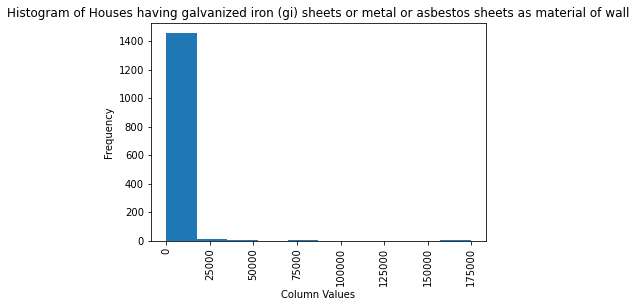

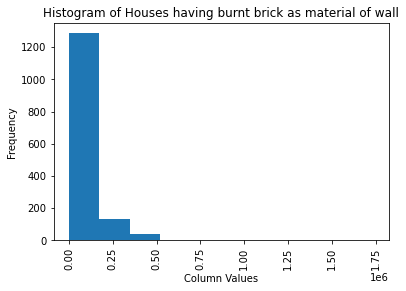

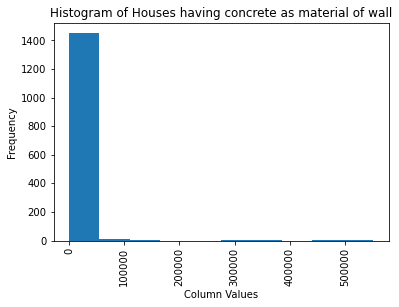

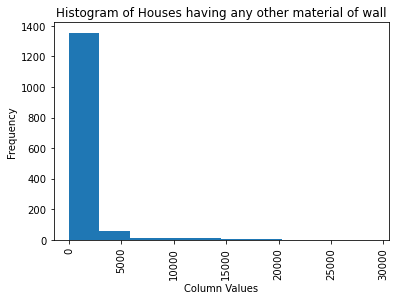

In [12]:
for cols in df.columns.values: #Iterating over columns
    plt.hist(df[cols]) #Plotting histogram for columns
    plt.xticks(rotation=90) #Rotating labels
    plt.xlabel("Column Values") #Xlabel
    plt.ylabel("Frequency") #Ylabel
    plt.title("Histogram of "+cols) #Title
    plt.show() #Displaying plot

In [13]:
newdf = df.drop(['Rowid', 'Country', 'State', 'District', 'Year', 'Type of residence namely rural or urban'], axis=1) #Created a separate dataframe with continous values, dropped discrete stuff

In [14]:
newdf #Displaying new dataframe

State lgd code  District lgd code  Number of census houses  \
0                  1                  1                   109465   
1                  1                  1                    33522   
2                  1                  2                    85561   
3                  1                  2                    13136   
4                  1                  3                   120312   
...              ...                ...                      ...   
1463              38                463                    42352   
1464              38                464                     5410   
1465              38                464                     5279   
1466              38                465                    35408   
1467              38                465                    37655   

      Houses having grass or thatch or bamboo etc. as material of wall  \
0                                                   270                  
1                                                    69                  
2                                                   134                  
3                                                    49                  
4                                                   410                  
...                                                 ...                  
1463                                                202                  
1464                                                  6                  
1465                                                 11                  
1466                                              16428                  
1467                                               2156                  

      Houses having plastic or polythene as material of wall  \
0                                                  1331        
1                                                   121        
2                                                   168        
3                                                    27        
4                                                   173        
...                                                 ...        
1463                                                150        
1464                                                  0        
1465                                                  1        
1466                                                 62        
1467                                                140        

      Houses having mud or unburnt brick as material of wall  \
0                                                 22710        
1                                                  6807        
2                                                  7174        
3                                                   935        
4                                                 19207        
...                                                 ...        
1463                                                426        
1464                                                 50        
1465                                                  6        
1466                                               4939        
1467                                               1667        

      Houses having wood as material of wall  \
0                                       3014   
1                                        123   
2                                        960   
3                                         24   
4                                       3227   
...                                      ...   
1463                                      95   
1464                                       2   
1465                                       0   
1466                                     145   
1467                                     142   

      Houses having stone not packed with mortar as material of wall  \
0                                                  3034                
1                                        

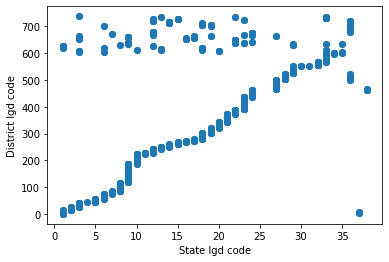

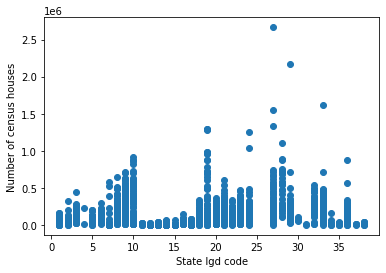

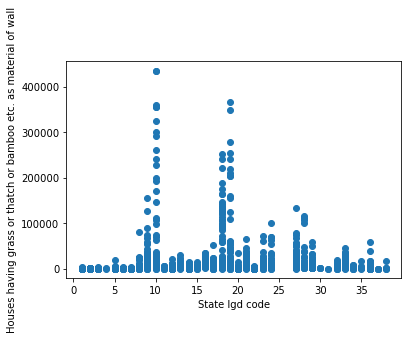

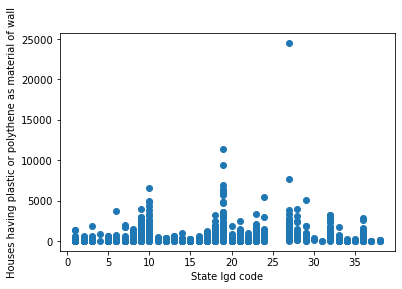

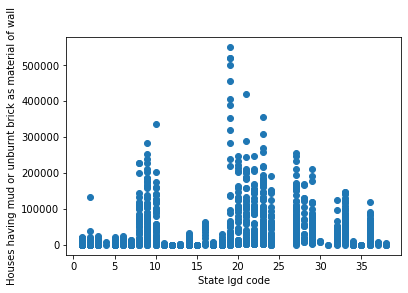

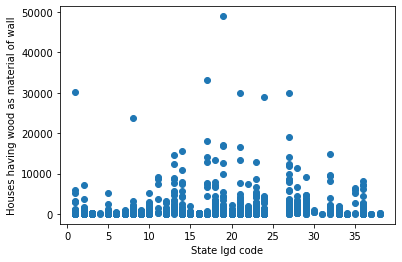

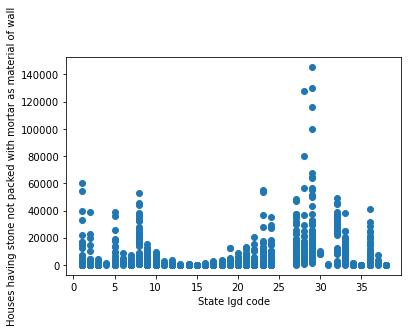

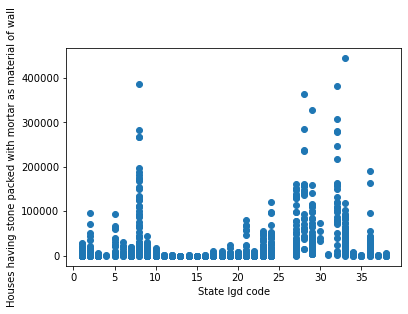

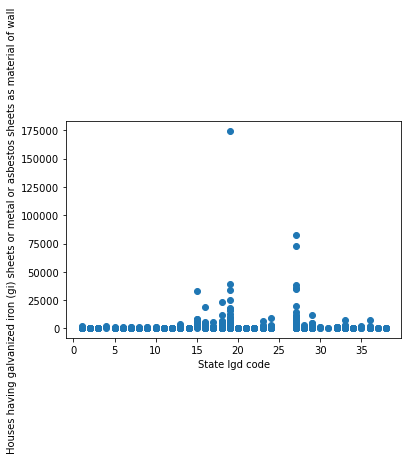

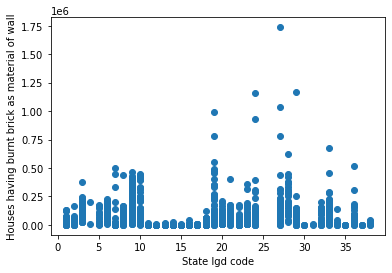

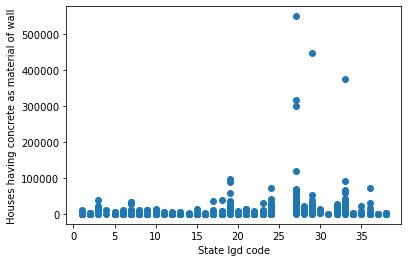

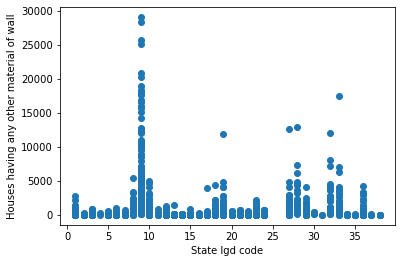

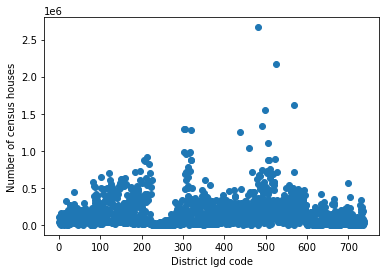

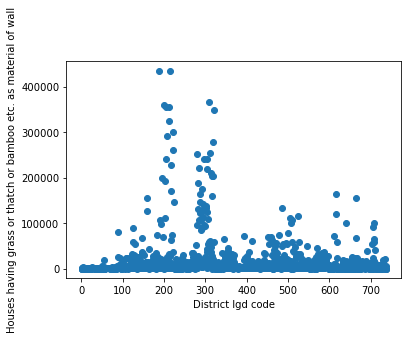

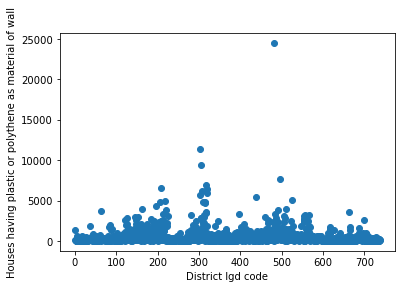

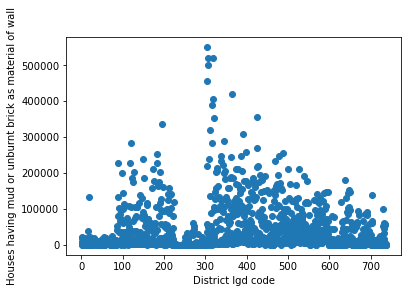

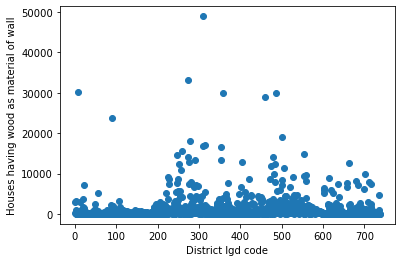

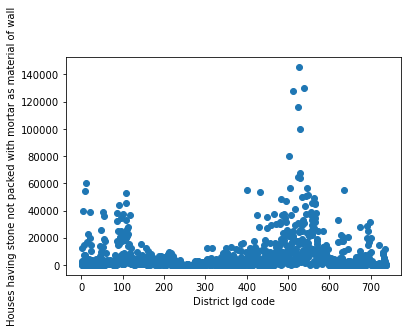

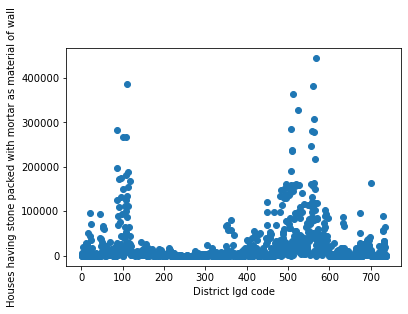

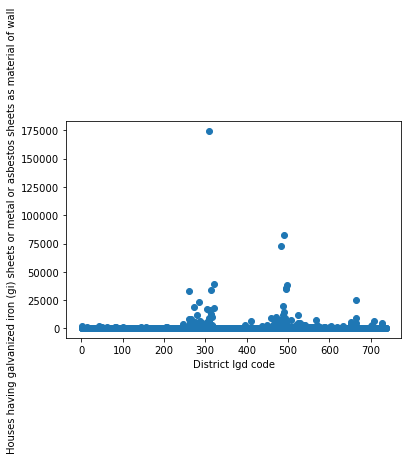

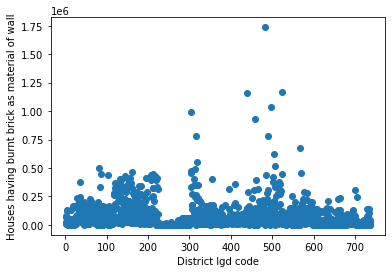

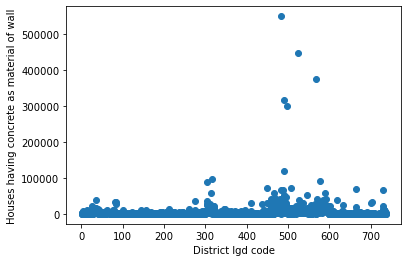

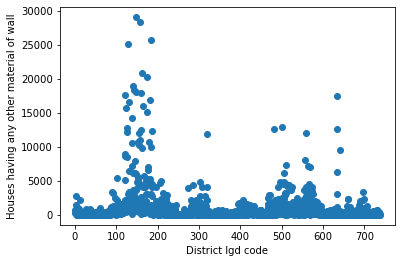

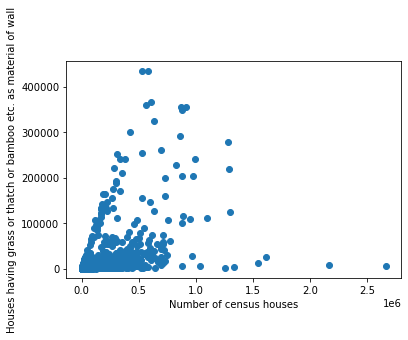

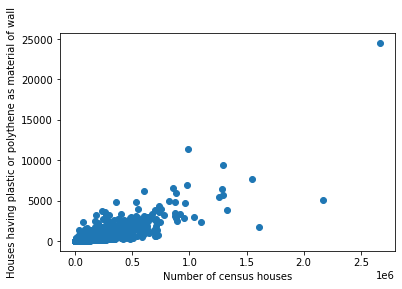

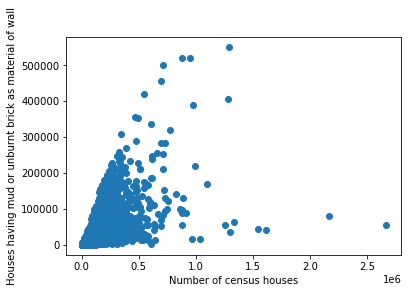

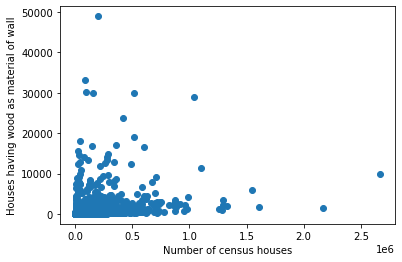

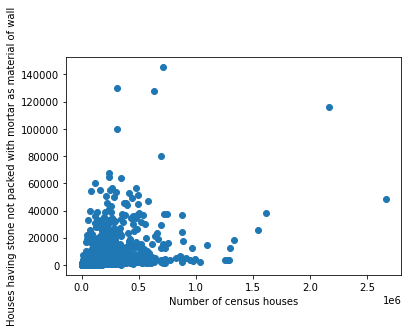

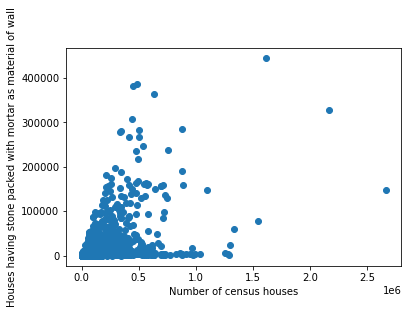

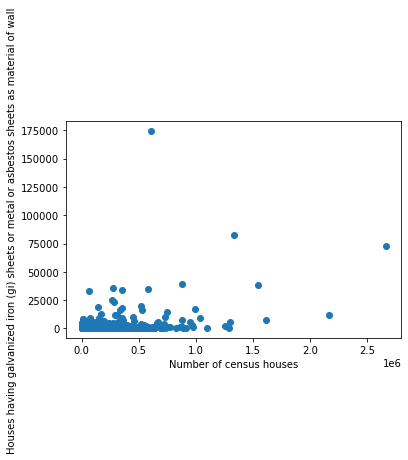

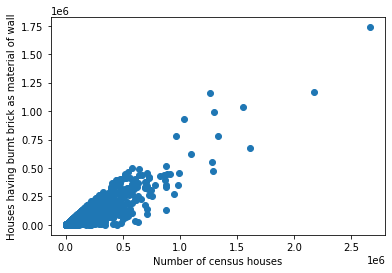

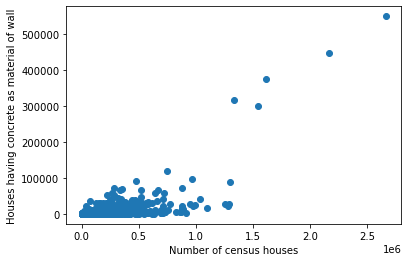

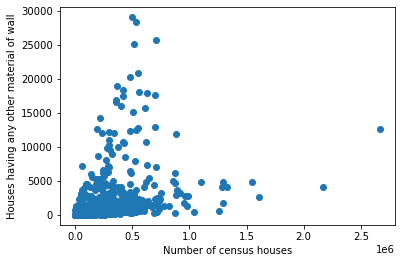

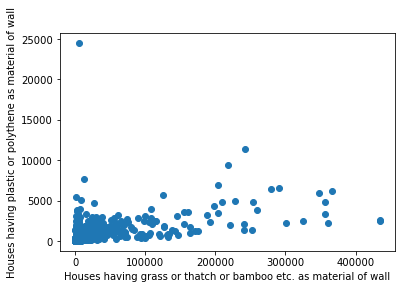

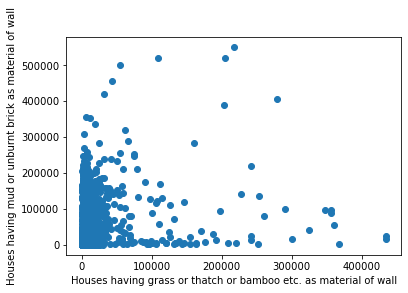

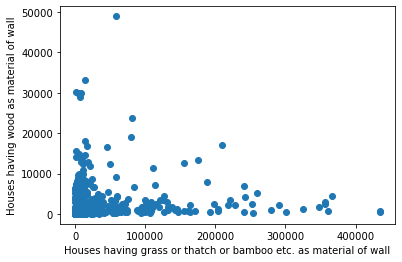

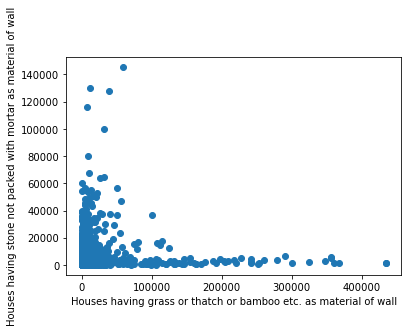

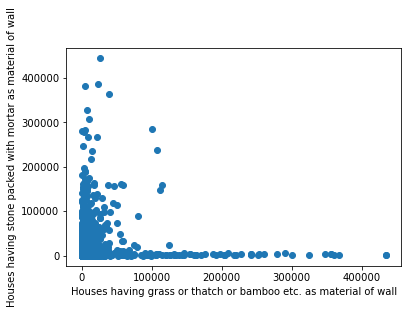

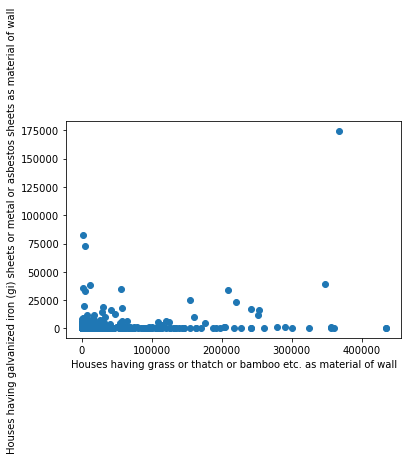

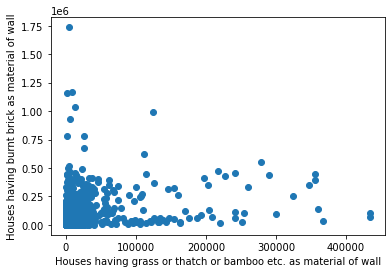

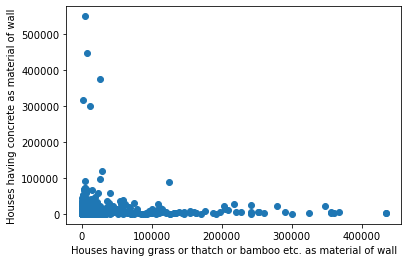

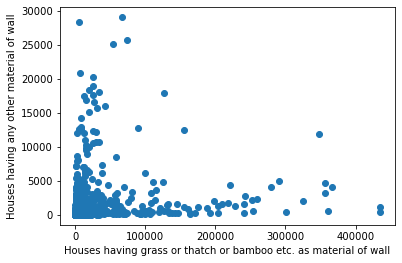

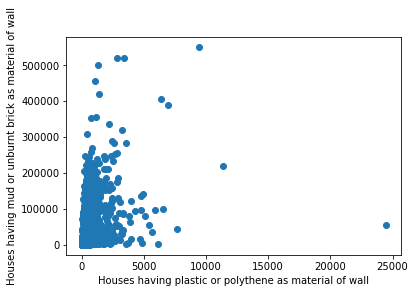

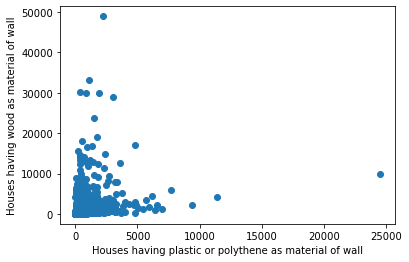

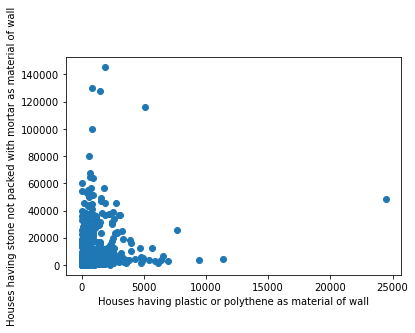

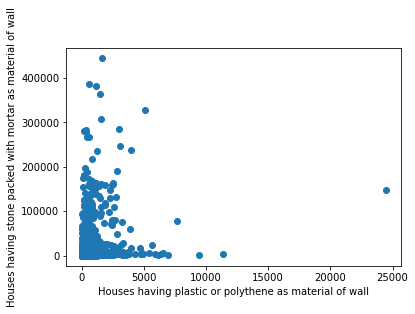

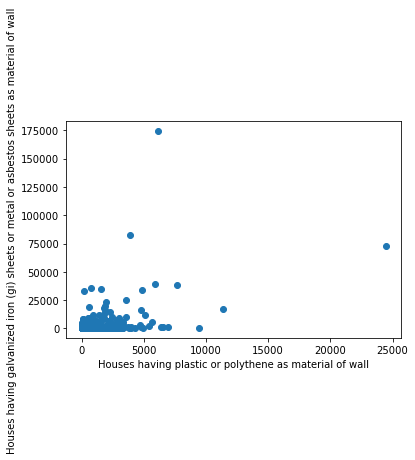

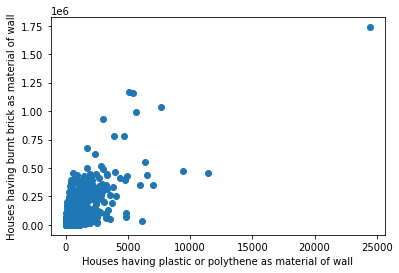

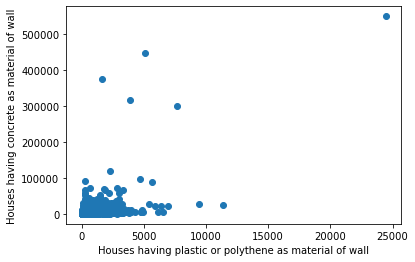

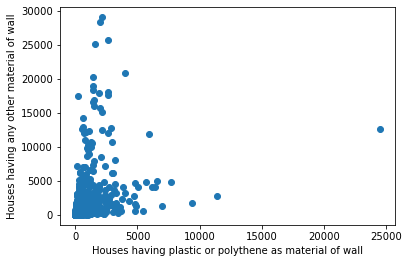

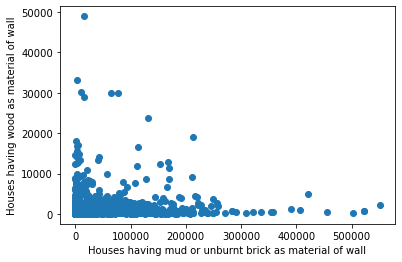

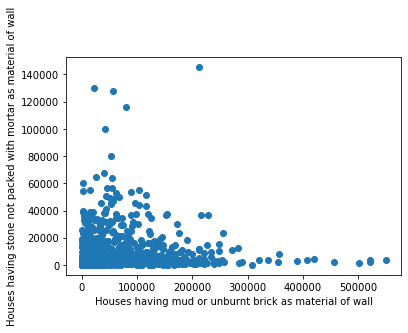

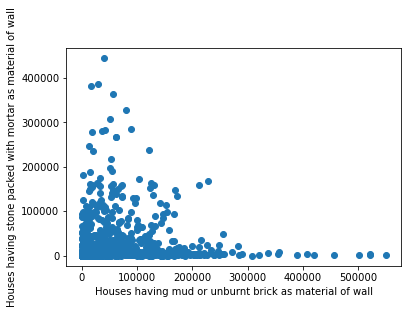

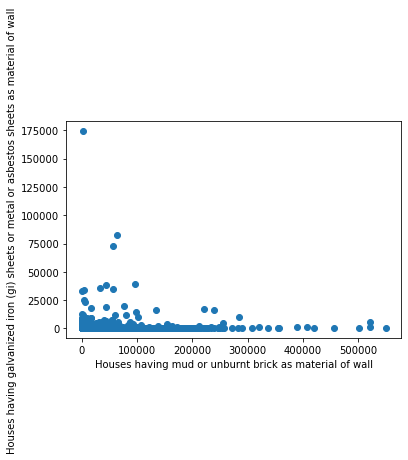

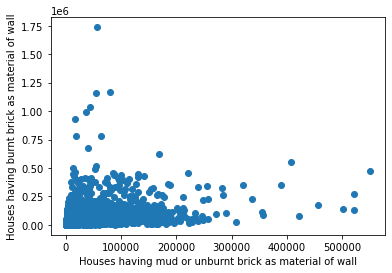

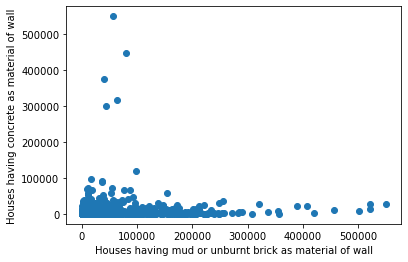

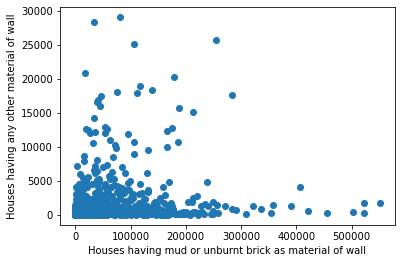

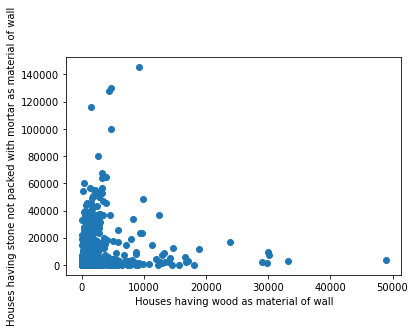

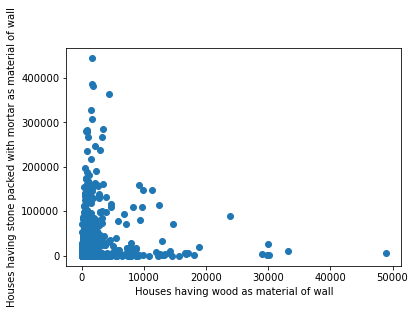

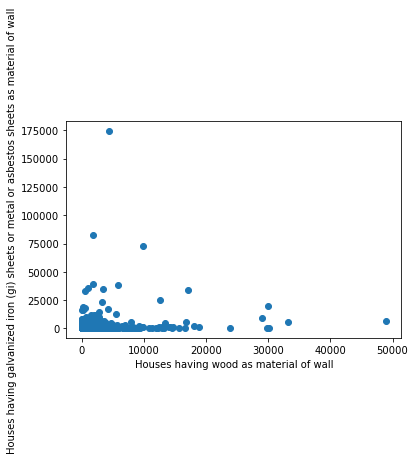

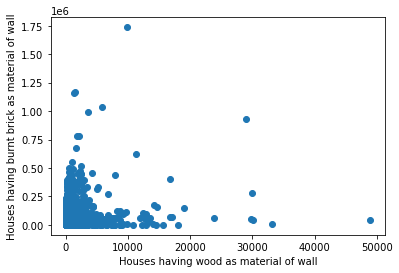

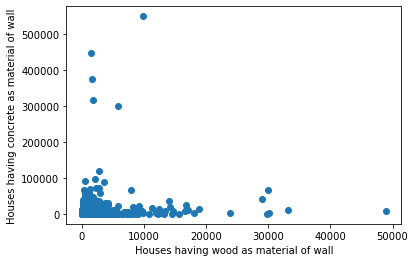

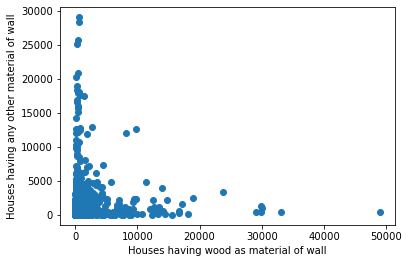

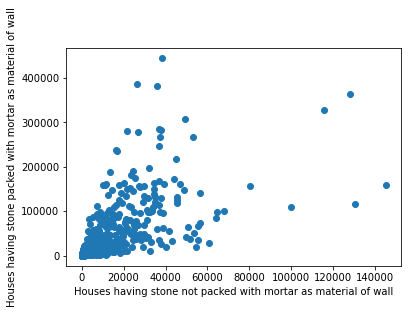

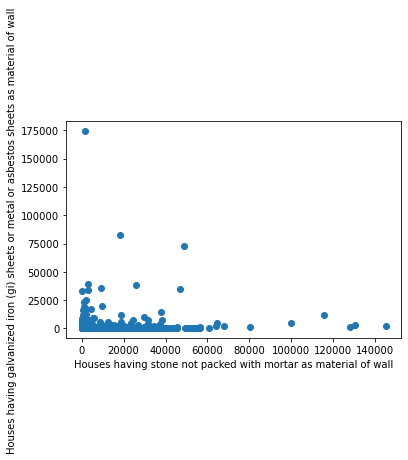

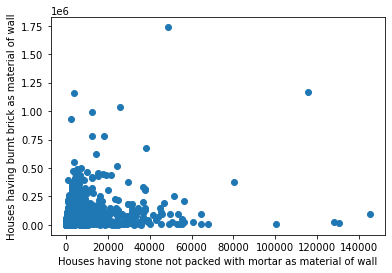

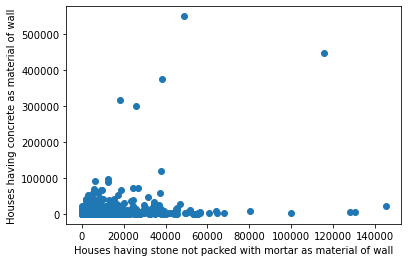

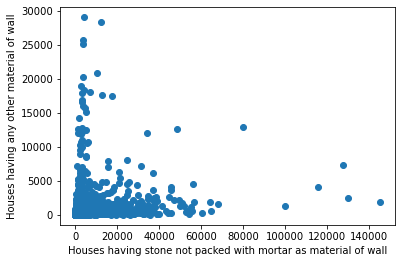

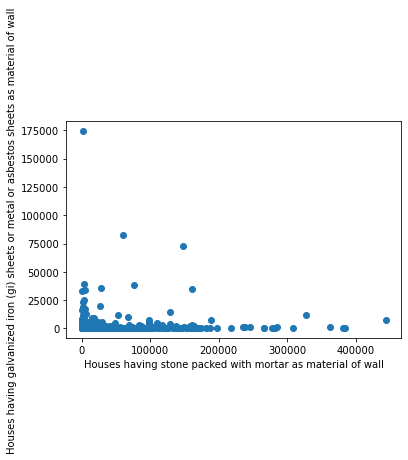

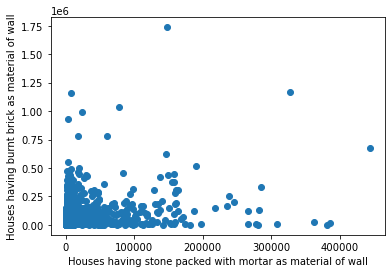

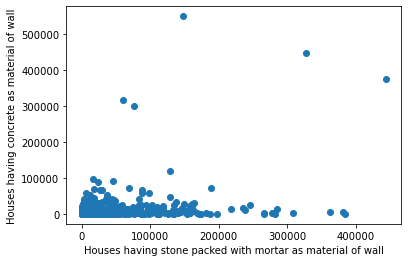

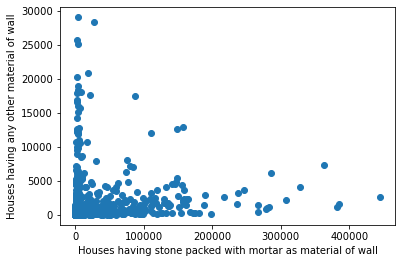

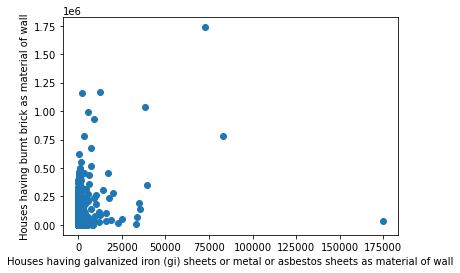

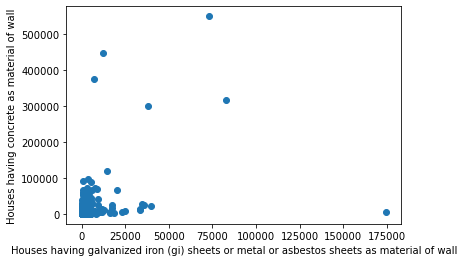

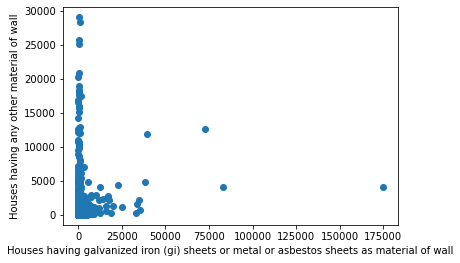

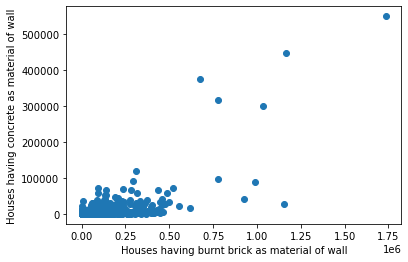

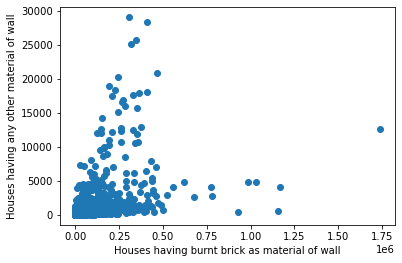

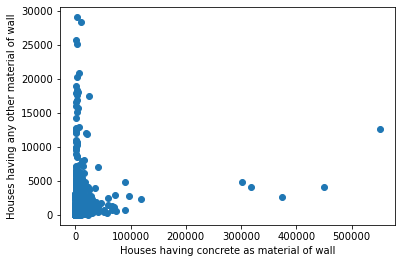

In [15]:
for i in range(0, newdf.shape[1]): #iterating columns
    for j in range(i+1, newdf.shape[1]): #iterating columns excpect i
        plt.scatter(newdf[newdf.columns[i]], newdf[newdf.columns[j]]) #PLotting scatterplot
        plt.xlabel(newdf.columns[i]) #xlabel 
        plt.ylabel(newdf.columns[j]) #ylabel
        plt.show() #displaying plot

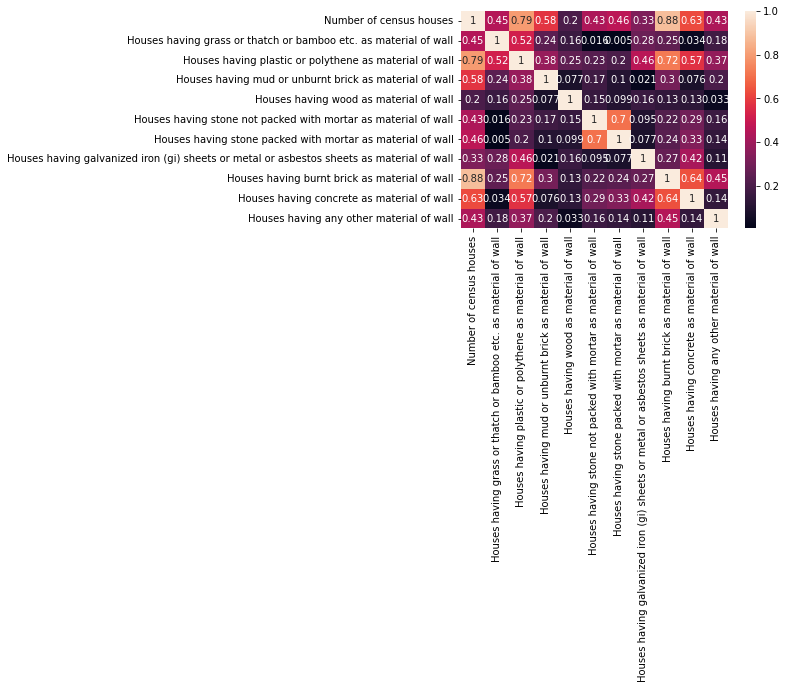

In [16]:
sns.heatmap(
    newdf.drop(['State lgd code', 'District lgd code'], axis=1).corr(), #Dropped unnecesary columns because in real life district code and statecode with no of houses has no correlation
    annot = True
) #generating correlation matrix using numerical matrix generated by df.corr
plt.show()# Displaying plot

In [17]:
calcdf= newdf.drop(['State lgd code', 'District lgd code'], axis=1) #new dataframe with only house values for ease of calculations

In [18]:
calcdf

Number of census houses  \
0                      109465   
1                       33522   
2                       85561   
3                       13136   
4                      120312   
...                       ...   
1463                    42352   
1464                     5410   
1465                     5279   
1466                    35408   
1467                    37655   

      Houses having grass or thatch or bamboo etc. as material of wall  \
0                                                   270                  
1                                                    69                  
2                                                   134                  
3                                                    49                  
4                                                   410                  
...                                                 ...                  
1463                                                202                  
1464                                                  6                  
1465                                                 11                  
1466                                              16428                  
1467                                               2156                  

      Houses having plastic or polythene as material of wall  \
0                                                  1331        
1                                                   121        
2                                                   168        
3                                                    27        
4                                                   173        
...                                                 ...        
1463                                                150        
1464                                                  0        
1465                                                  1        
1466                                                 62        
1467                                                140        

      Houses having mud or unburnt brick as material of wall  \
0                                                 22710        
1                                                  6807        
2                                                  7174        
3                                                   935        
4                                                 19207        
...                                                 ...        
1463                                                426        
1464                                                 50        
1465                                                  6        
1466                                               4939        
1467                                               1667        

      Houses having wood as material of wall  \
0                                       3014   
1                                        123   
2                                        960   
3                                         24   
4                                       3227   
...                                      ...   
1463                                      95   
1464                                       2   
1465                                       0   
1466                                     145   
1467                                     142   

      Houses having stone not packed with mortar as material of wall  \
0                                                  3034                
1                                                   268                
2                                                   748                
3                                                   187                
4                                                 12552                
...                                                 ...                
1463                                                 72                
1464                         

In [19]:
censustot = calcdf.drop(['Number of census houses'], axis=1).sum(axis=1) #Creating a column with sum across rows except total houses

In [20]:
correct = True #Flag to indicated anomalies
for i,j in zip(calcdf['Number of census houses'], censustot): #Iterating sum and total house columns simultaneously
    if(abs(i-j)>10): #Allowed margin of 10 houses due to rounding of when convert3ed to int
            correct = False
print(correct) #Prints false if magin was exceeded

True


In [21]:
for col in calcdf.drop(['Number of census houses'], axis=1).columns.values: #Iterating columns except census total
    df["Percentage Of "+col]=(df[col]/df['Number of census houses'])*100 #Creating new columns after calculating percentage

In [22]:
df

Rowid Country  State lgd code  \
0         1   India               1   
1         2   India               1   
2         3   India               1   
3         4   India               1   
4         5   India               1   
...     ...     ...             ...   
1463   1469   India              38   
1464   1470   India              38   
1465   1471   India              38   
1466   1472   India              38   
1467   1473   India              38   

                                             State  District lgd code  \
0                                Jammu And Kashmir                  1   
1                                Jammu And Kashmir                  1   
2                                Jammu And Kashmir                  2   
3                                Jammu And Kashmir                  2   
4                                Jammu And Kashmir                  3   
...                                            ...                ...   
1463  The Dadra And Nagar Haveli And Daman And Diu                463   
1464  The Dadra And Nagar Haveli And Daman And Diu                464   
1465  The Dadra And Nagar Haveli And Daman And Diu                464   
1466  The Dadra And Nagar Haveli And Daman And Diu                465   
1467  The Dadra And Nagar Haveli And Daman And Diu                465   

                    District  Year Type of residence namely rural or urban  \
0                   Anantnag  2011                                   Rural   
1                   Anantnag  2011                                   Urban   
2                     Budgam  2011                                   Rural   
3                     Budgam  2011                                   Urban   
4                  Baramulla  2011                                   Rural   
...                      ...   ...                                     ...   
1463                   Daman  2011                                   Urban   
1464                     Diu  2011                                   Rural   
1465                     Diu  2011                                   Urban   
1466  Dadra And Nagar Haveli  2011                                   Rural   
1467  Dadra And Nagar Haveli  2011                                   Urban   

      Number of census houses  \
0                      109465   
1                       33522   
2                       85561   
3                       13136   
4                      120312   
...                       ...   
1463                    42352   
1464                     5410   
1465                     5279   
1466                    35408   
1467                    37655   

      Houses having grass or thatch or bamboo etc. as material of wall  ...  \
0                                                   270                 ...   
1                                                    69                 ...   
2                                                   134                 ...   
3                                                    49                 ...   
4                                                   410                 ...   
...                                                 ...                 ...   
1463                                                202                 ...   
1464                                                  6                 ...   
1465                                                 11                 ...   
1466                                              16428                 ...   
1467                                               2156                 ...   

      Percentage Of Houses having grass or thatch or bamboo etc. as material of wall  \
0                                              0.246654                                
1                                              0.205835                                
2                                              0.156613                                
3                        

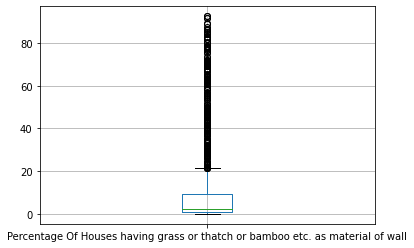

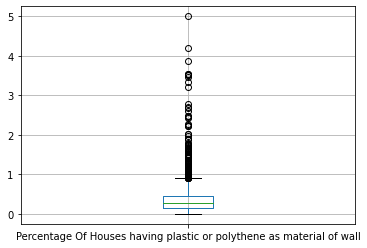

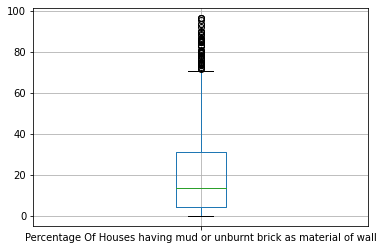

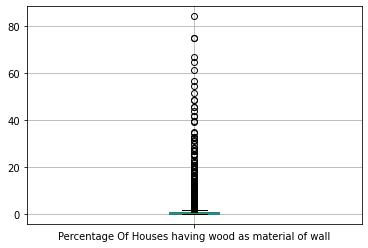

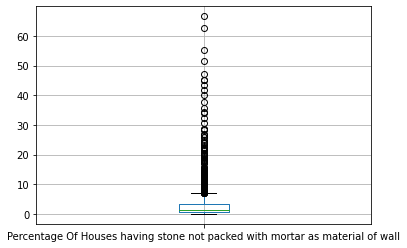

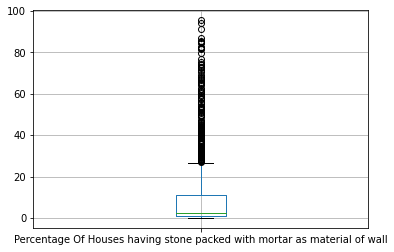

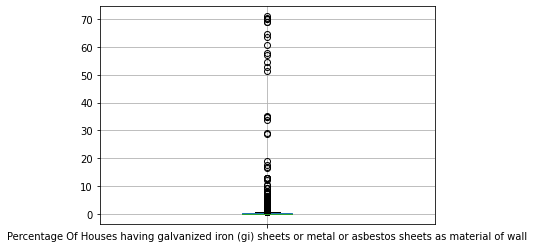

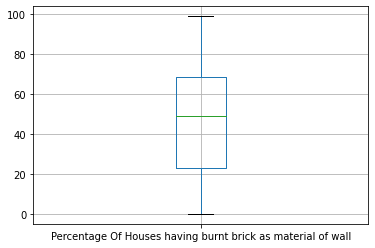

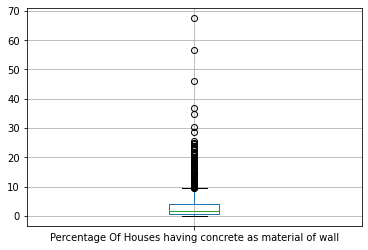

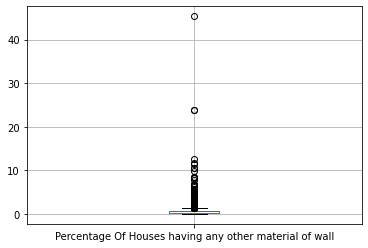

In [23]:
for i in range(19,29):#Iterating the new percentage columns
    df.boxplot(df.columns[i]) #Plotting boxplot for each column value
    plt.show() #Displaying boxplot

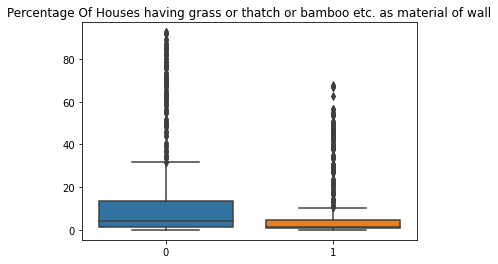

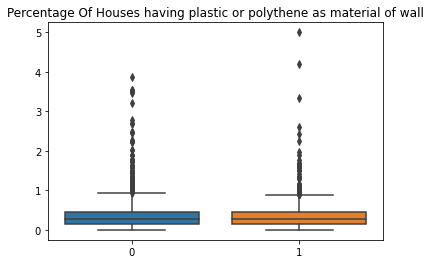

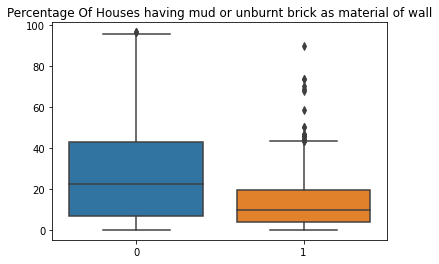

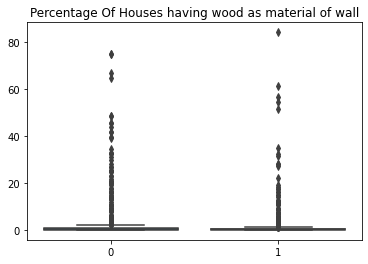

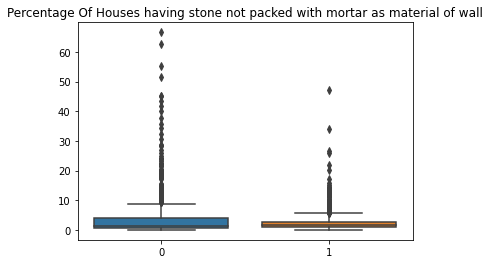

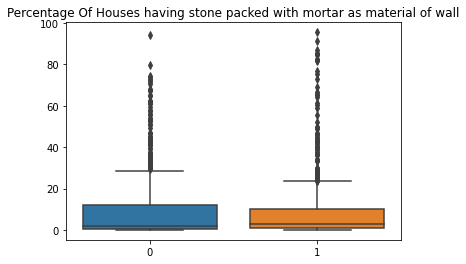

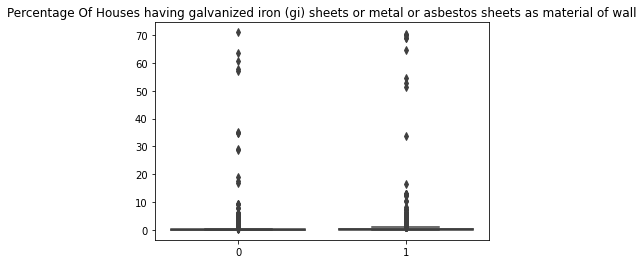

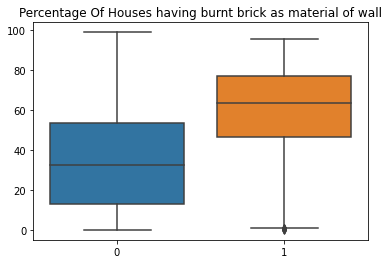

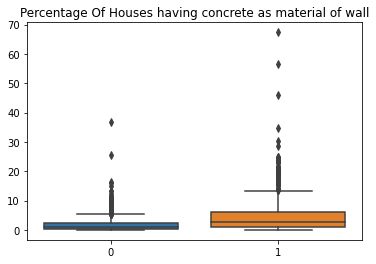

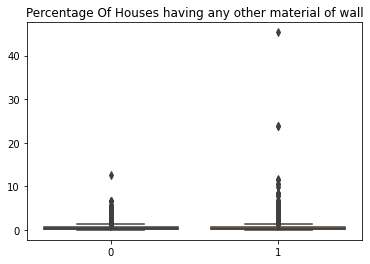

In [24]:
ruraldf = df[df['Type of residence namely rural or urban'] == "Rural"] #Creating new dataframe with rows having Rural value
urbandf = df[df['Type of residence namely rural or urban'] == "Urban"] #Creating new dataframe with rows having Urban value
for i in range(19,29): #Iterating percentage columns
    sns.boxplot(data=[ruraldf[ruraldf.columns[i]], urbandf[urbandf.columns[i]]]) #Plotting boxplot of urban and rural side by side
    plt.title(ruraldf.columns[i]) #Adding title to boxplot
    plt.show() #Displaying the boxplots

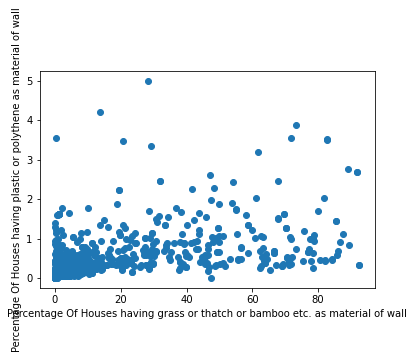

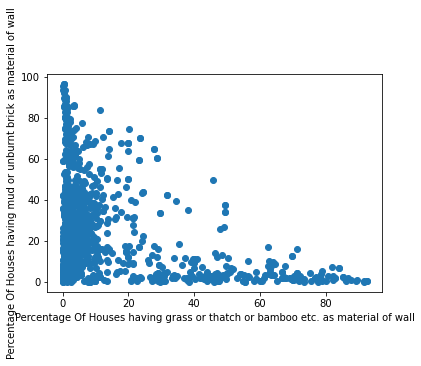

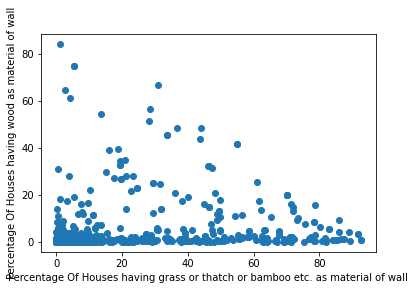

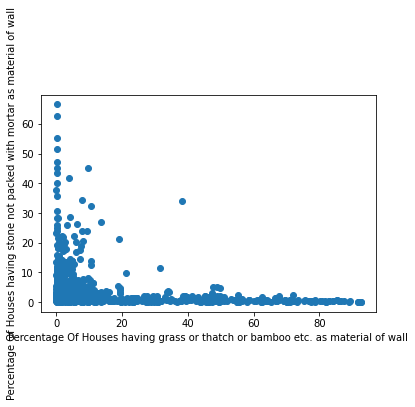

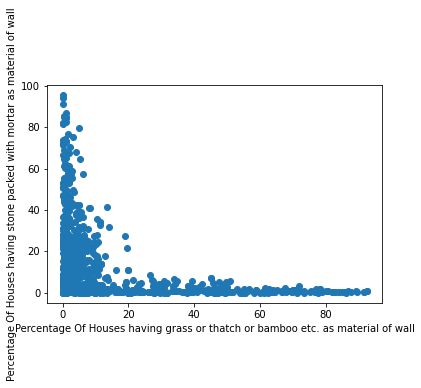

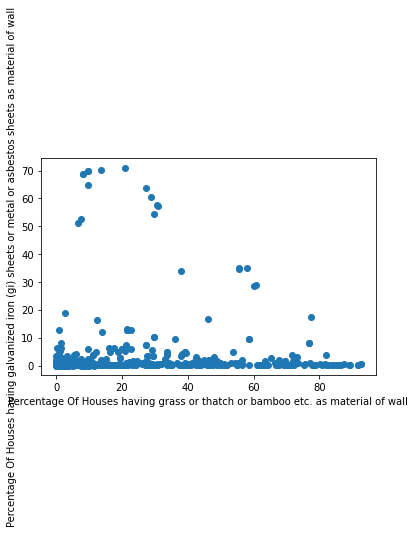

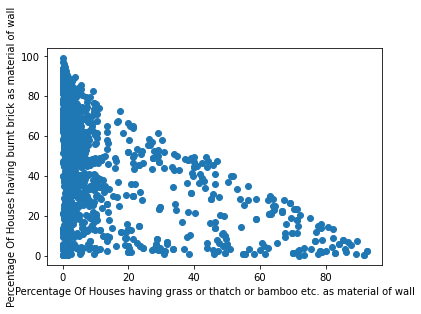

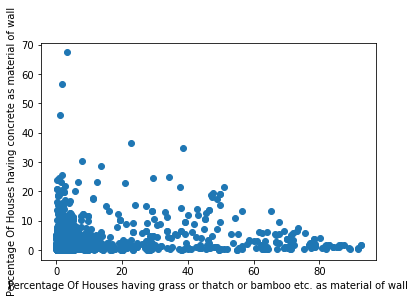

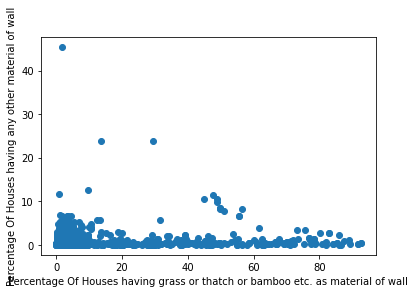

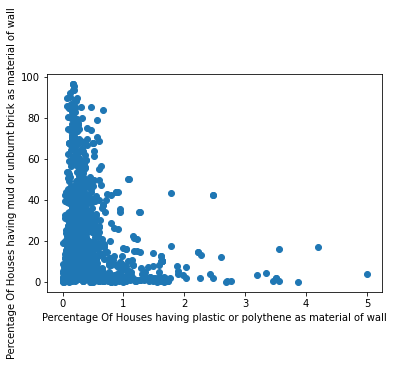

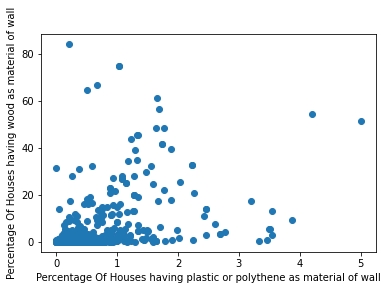

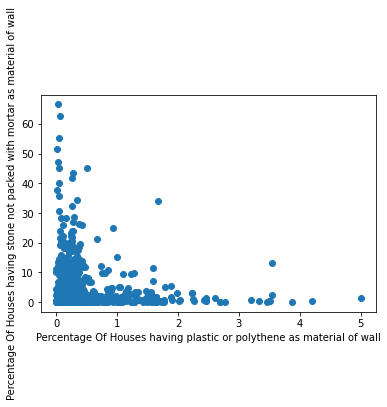

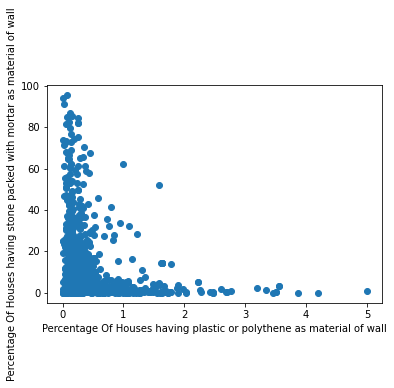

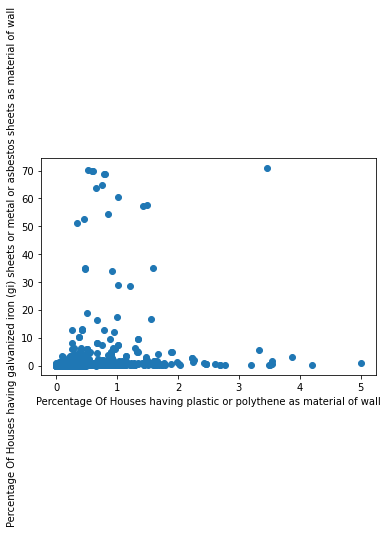

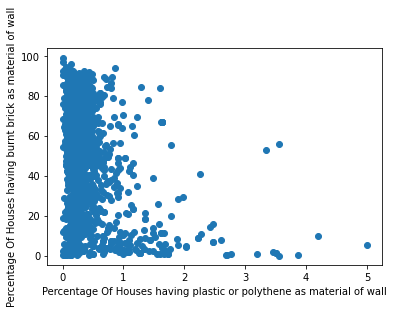

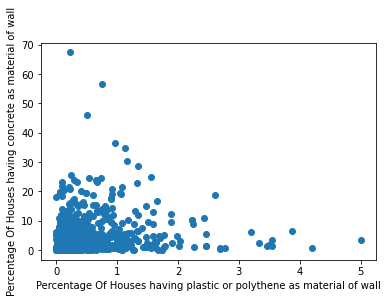

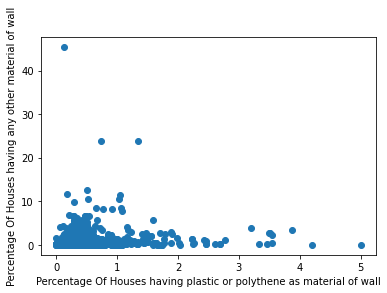

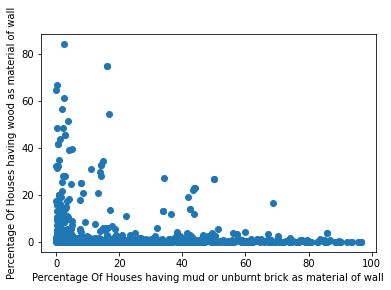

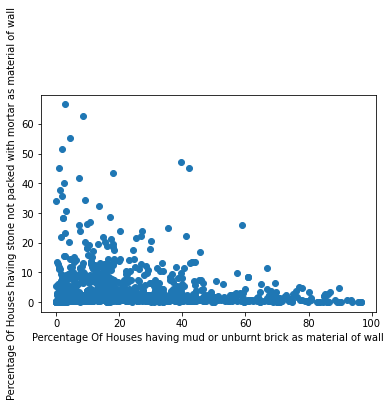

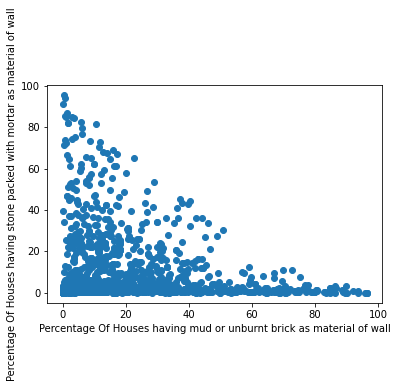

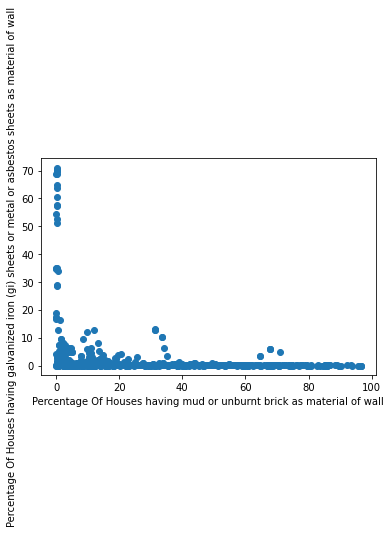

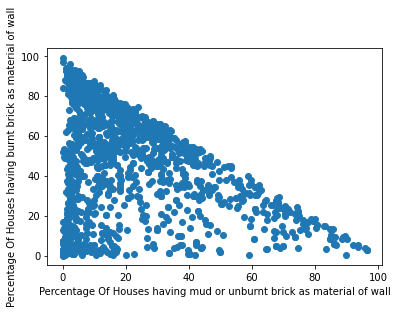

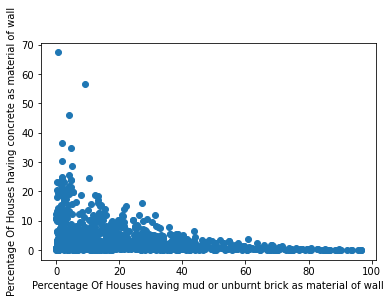

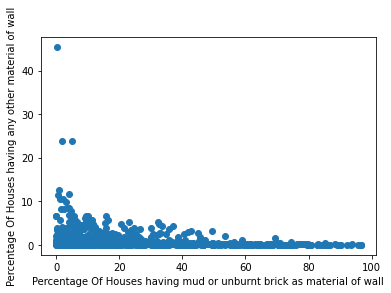

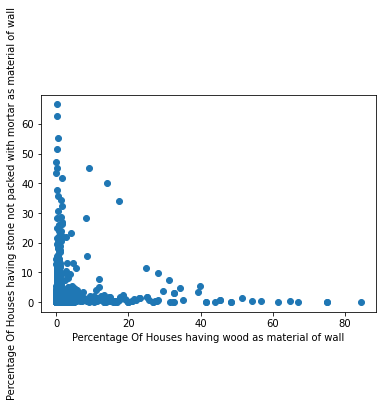

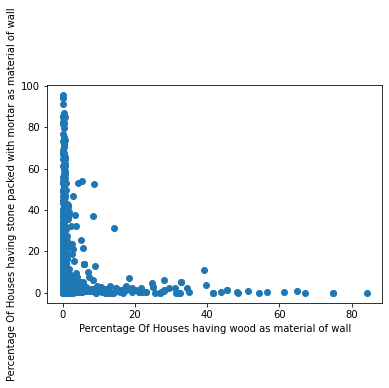

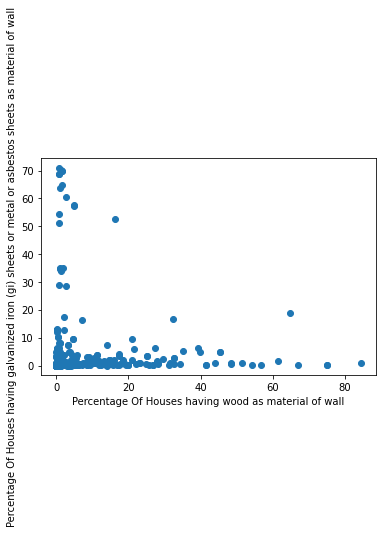

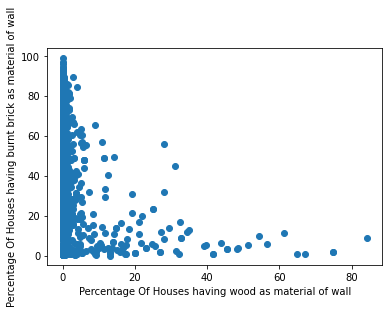

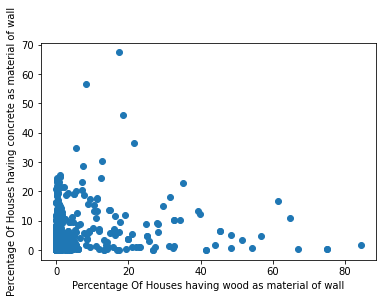

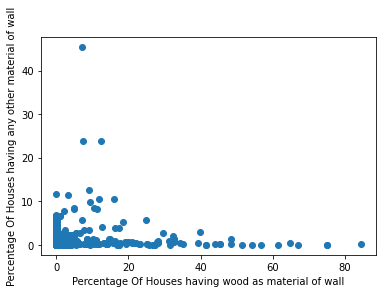

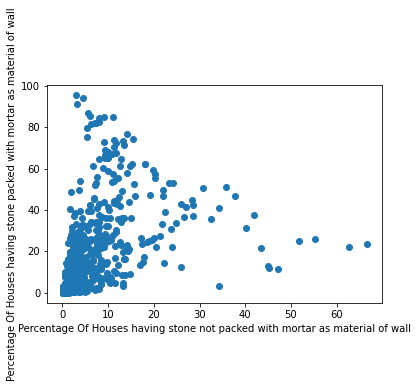

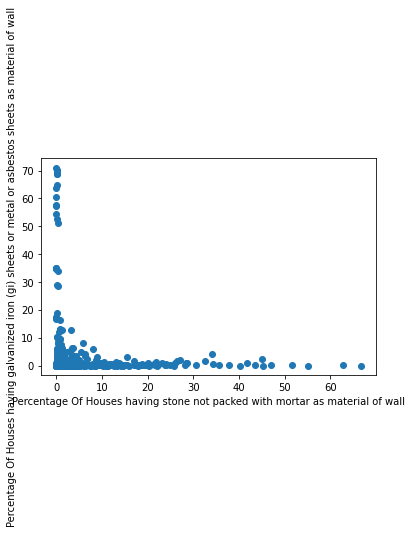

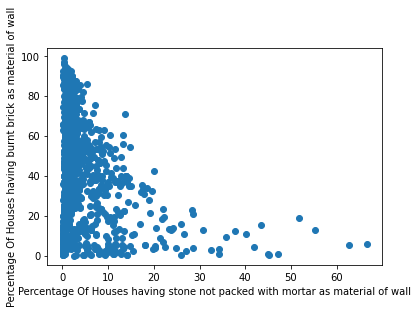

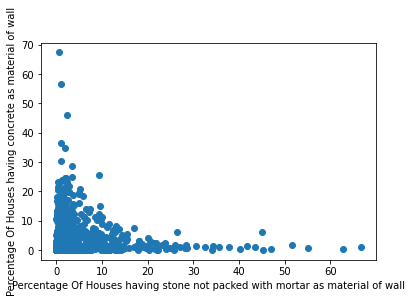

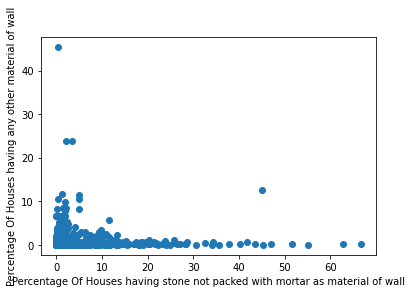

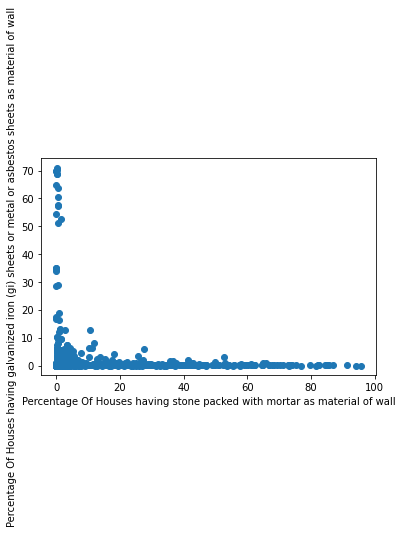

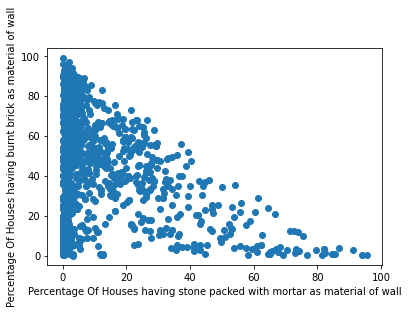

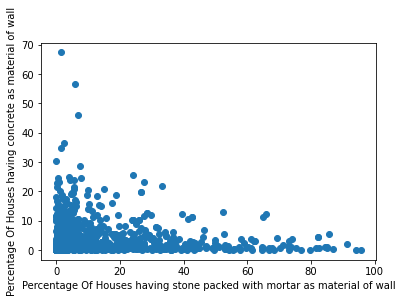

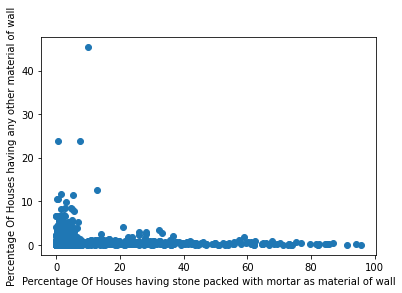

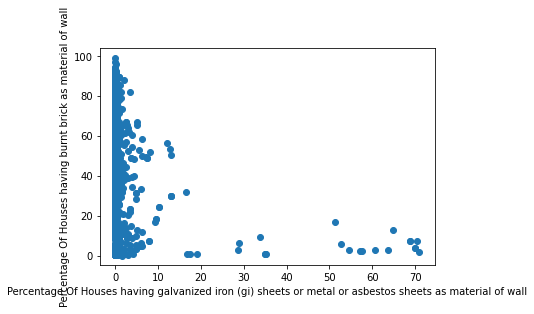

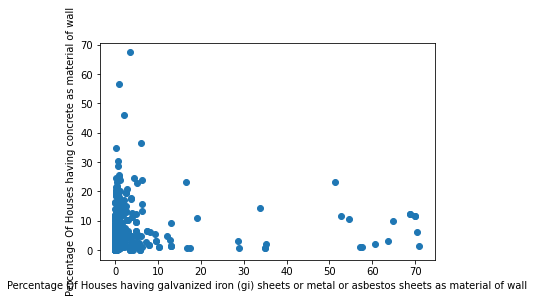

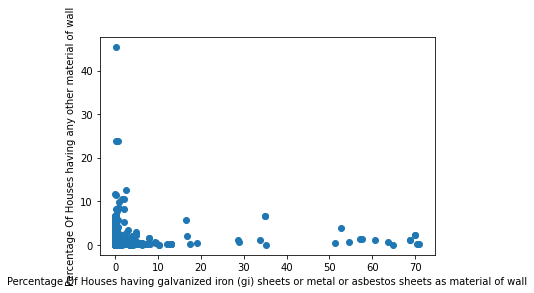

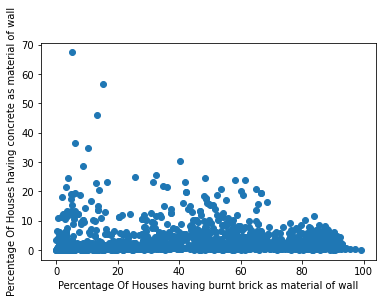

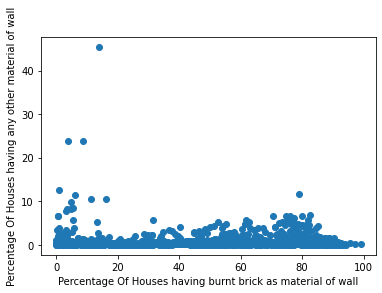

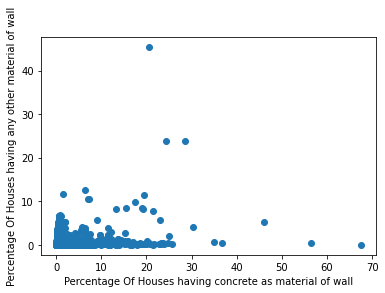

In [25]:
for i in range(19,29): #Iterating percentage columns
    for j in range(i+1, 29): #Iterating columns other the one selected 
        plt.scatter(df[df.columns[i]], df[df.columns[j]]) #Plotting scatter plot
        plt.xlabel(df.columns[i]) #Xlabel
        plt.ylabel(df.columns[j]) #Ylabel
        plt.show() #Displaying scatter plots

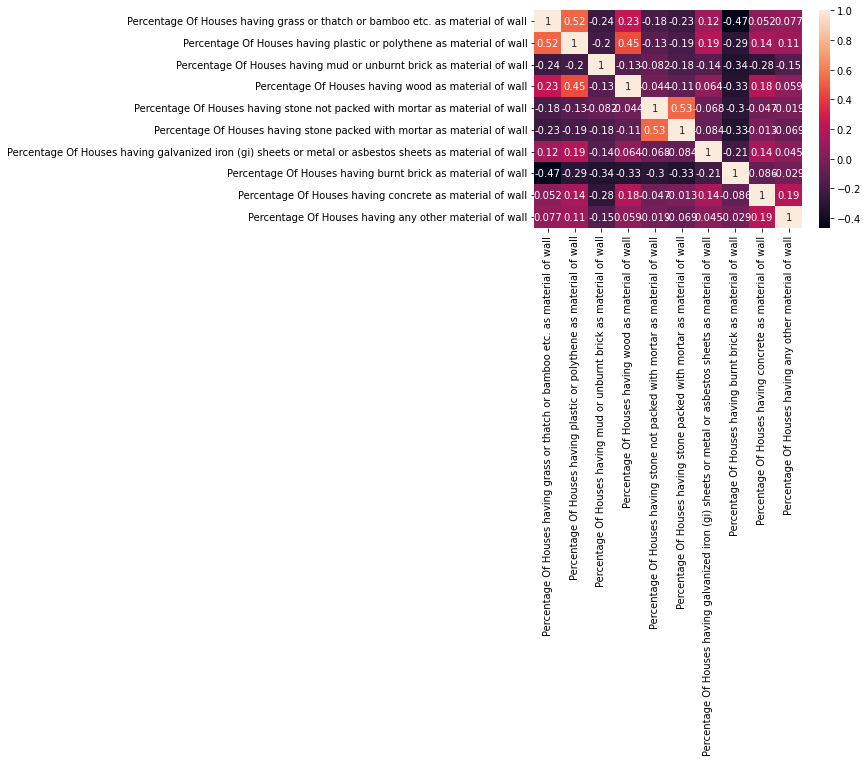

In [26]:
ax = sns.heatmap(
   df.iloc[:, 19:29].corr(),  #Selecting columns with percentage value for corr matrix
    annot=True #displays corr value
)

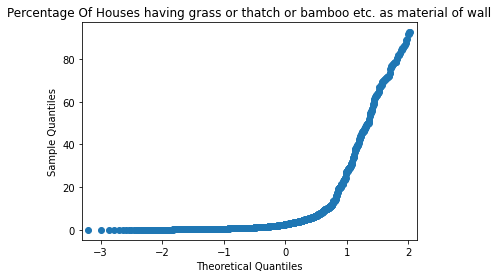

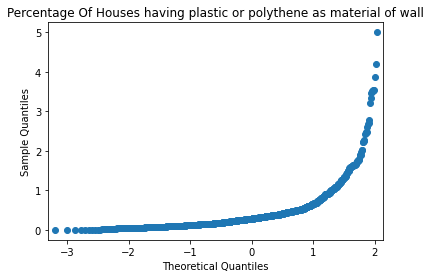

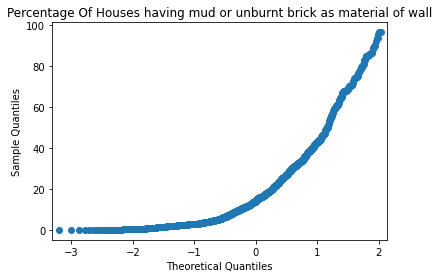

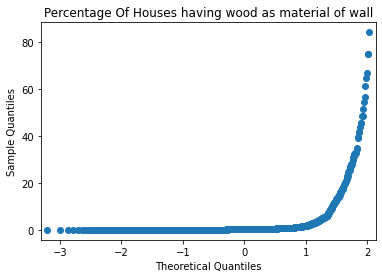

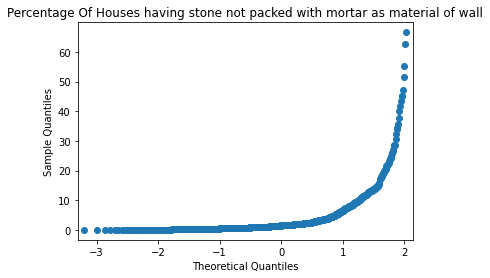

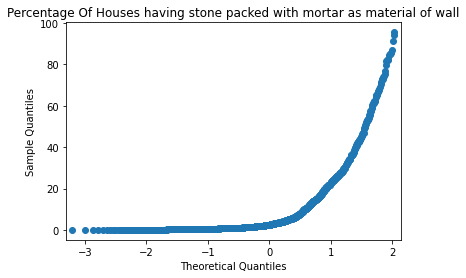

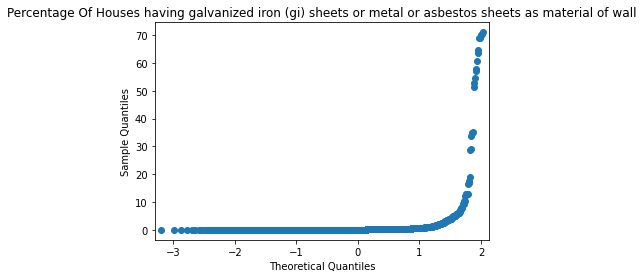

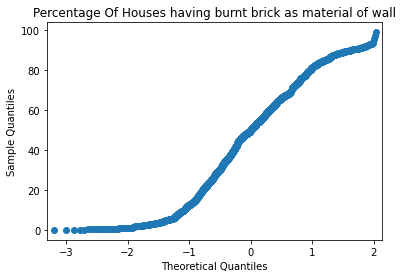

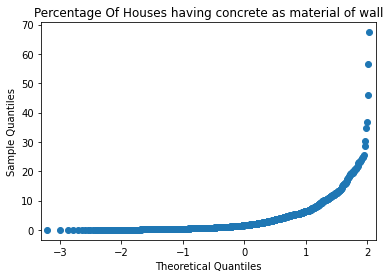

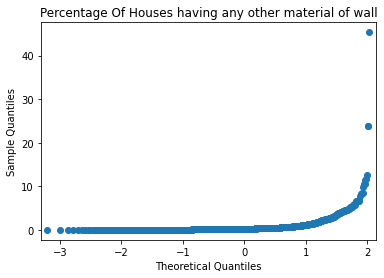

In [27]:
import statsmodels.api as sm #import for qq plot
for i in range(19,29): #iterating percentage columns for qq plot
    sm.qqplot(df.iloc[:,i]) #plotting qq plot for a columns
    plt.title(df.columns[i]) # Adding title to each plot
    plt.show()  #Displaying plots

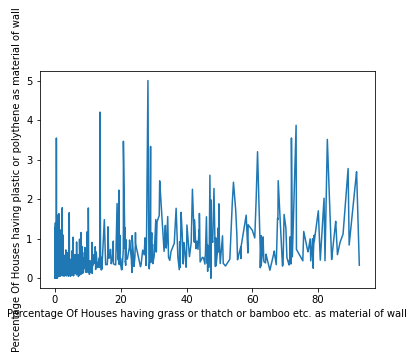

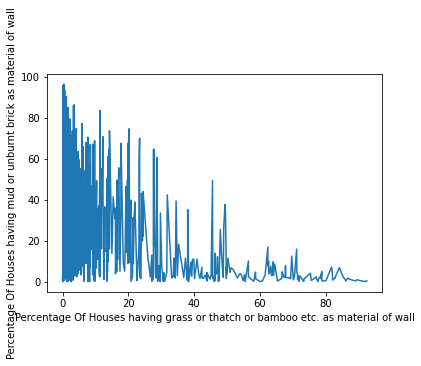

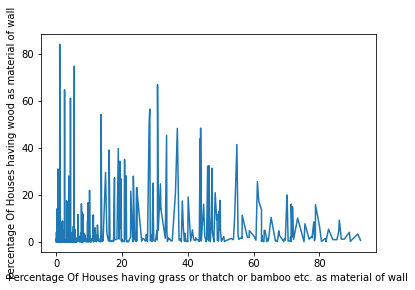

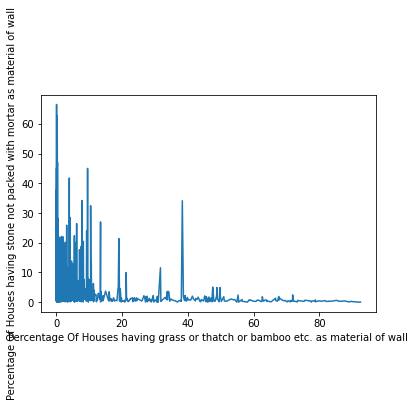

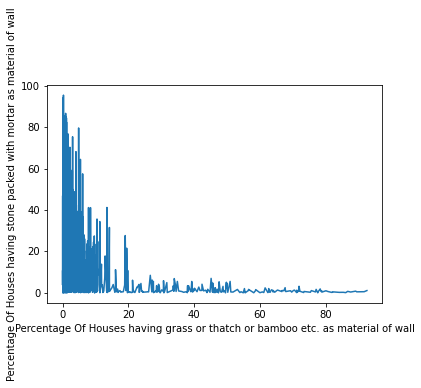

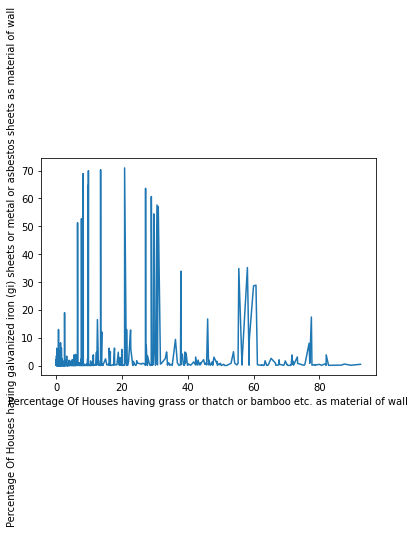

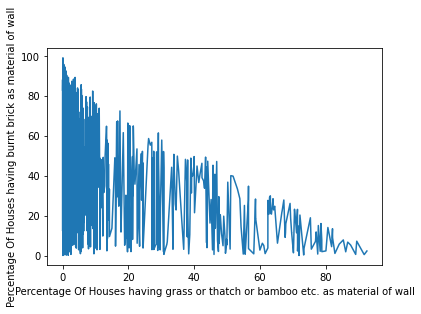

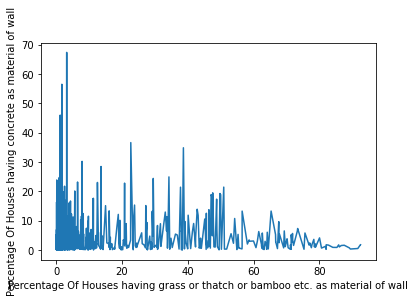

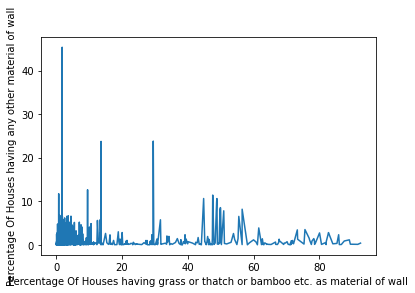

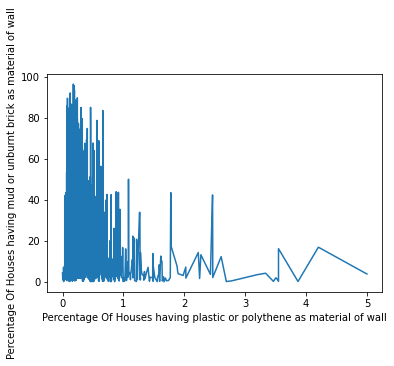

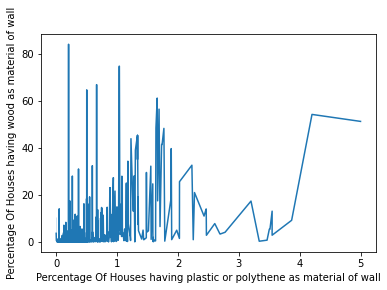

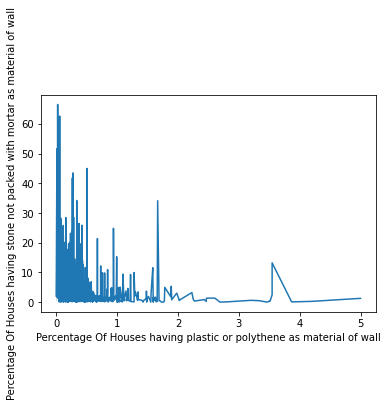

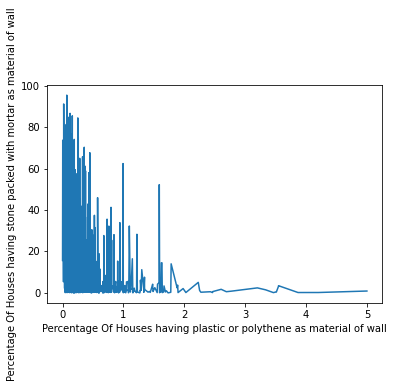

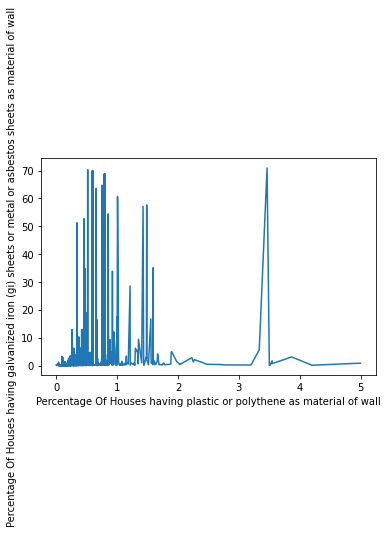

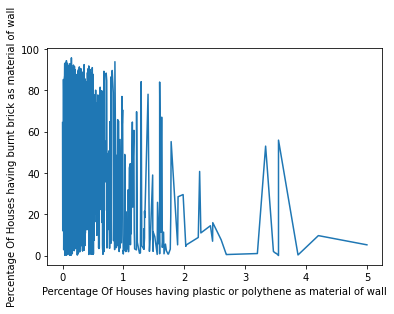

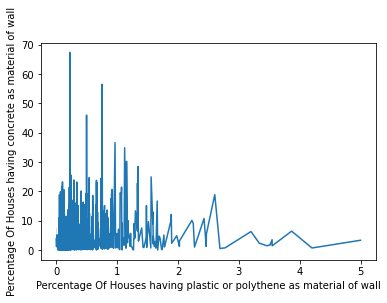

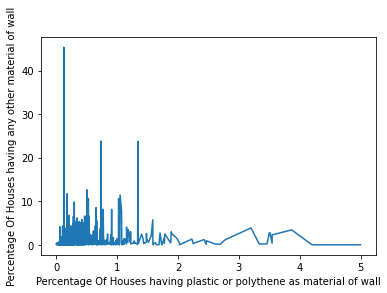

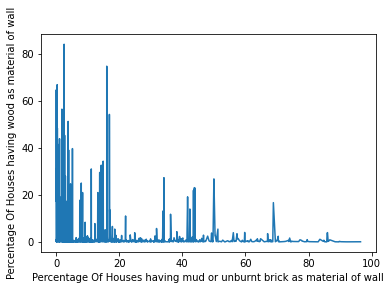

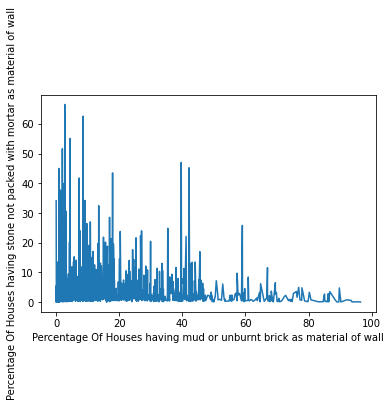

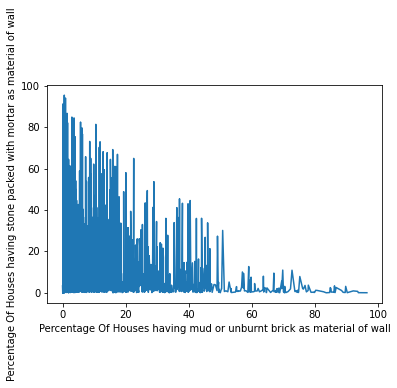

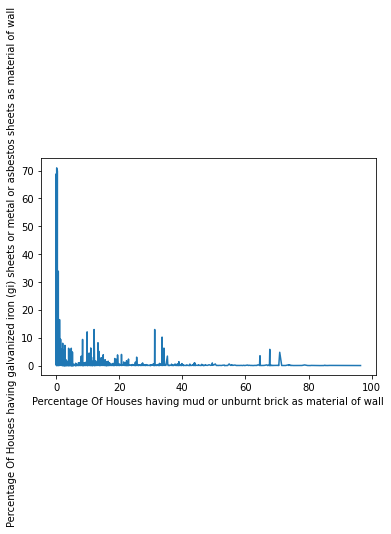

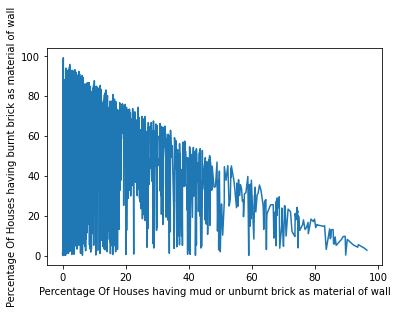

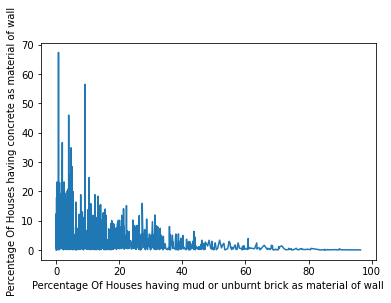

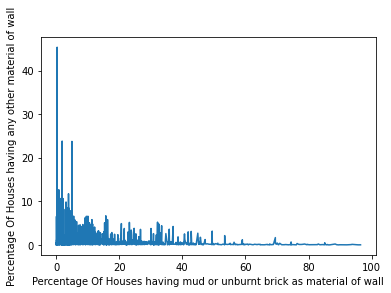

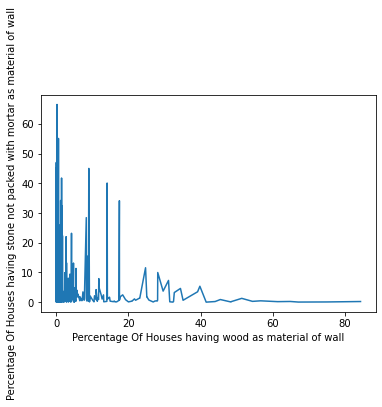

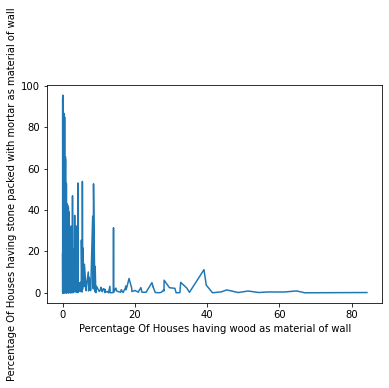

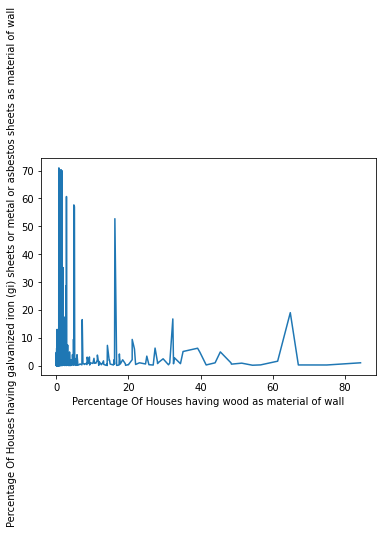

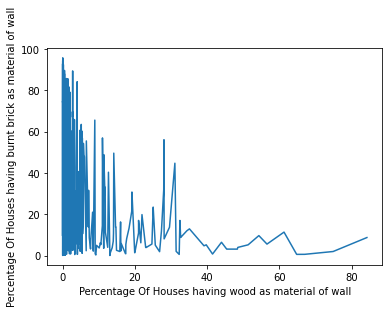

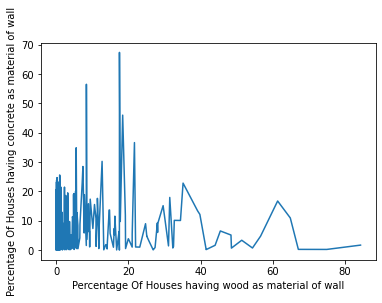

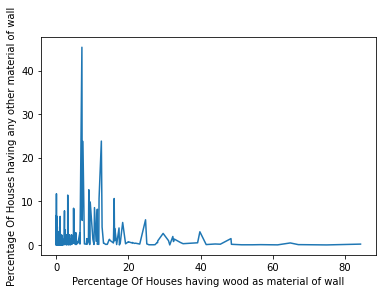

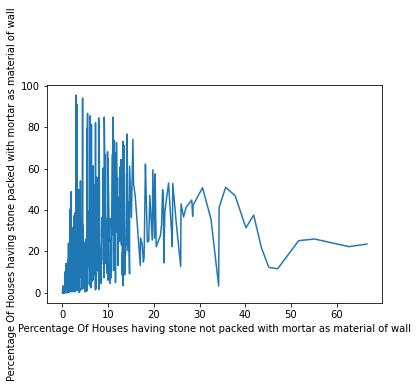

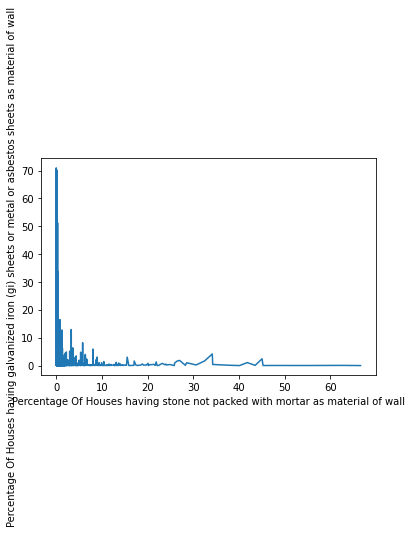

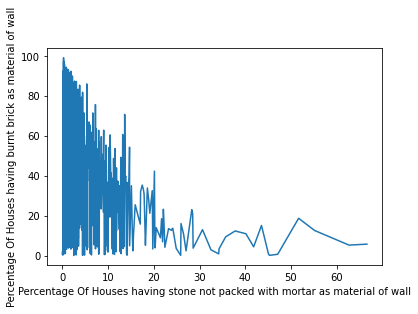

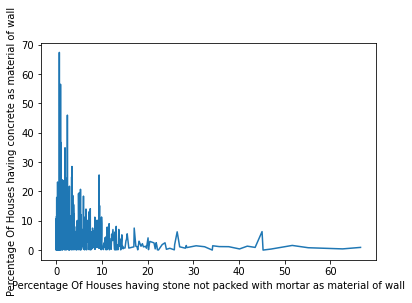

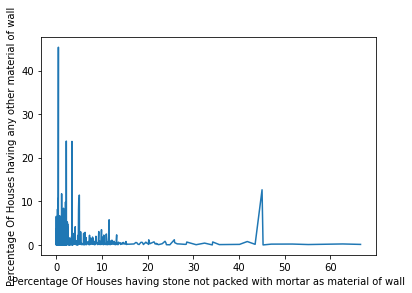

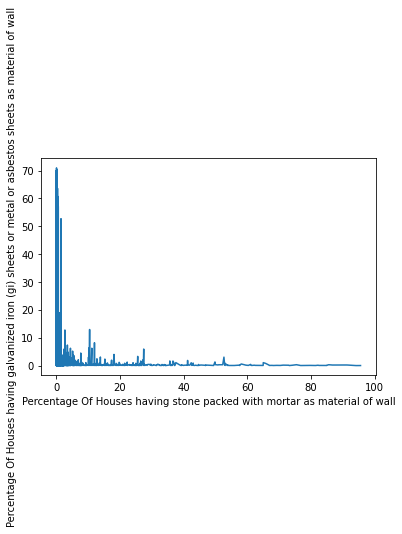

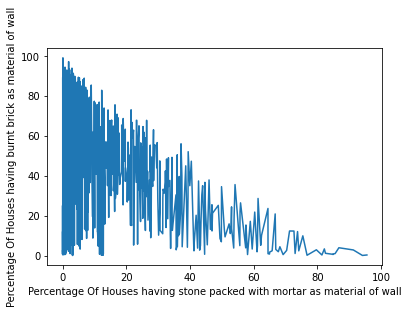

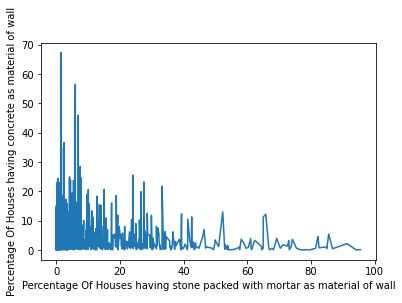

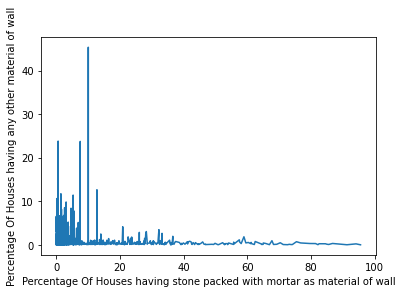

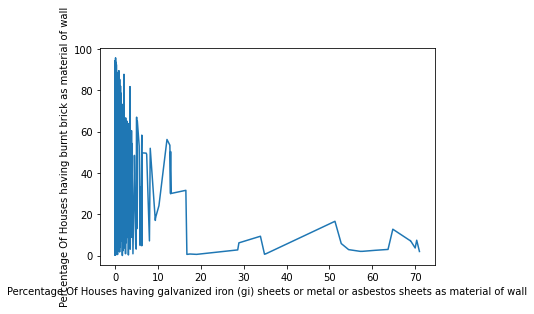

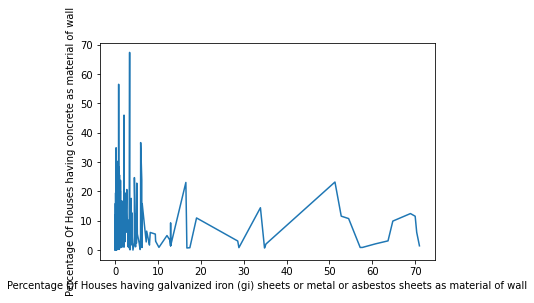

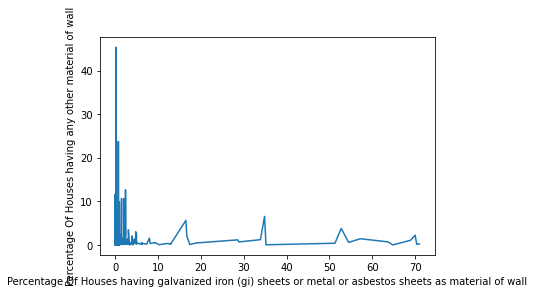

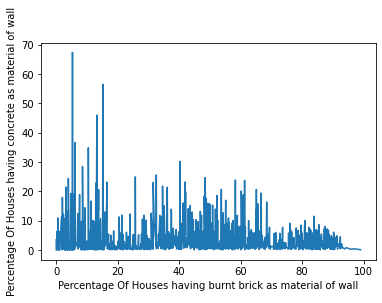

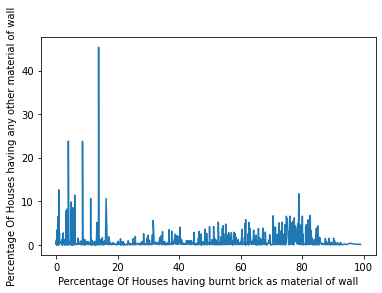

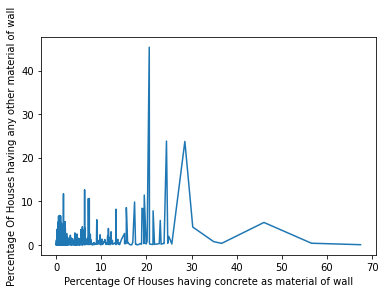

In [28]:
for i in range(19,29):#Iterating the new percentage columns
    for j in range(i+1, 29): #Iterating in pairs
        sns.lineplot(x=df[df.columns[i]], y=df[df.columns[j]]) #Plotting lineplot for each column pair
        plt.show() #Displaying lineplot

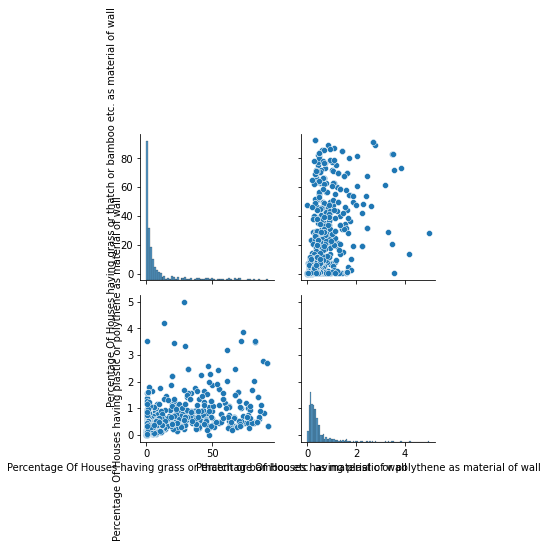

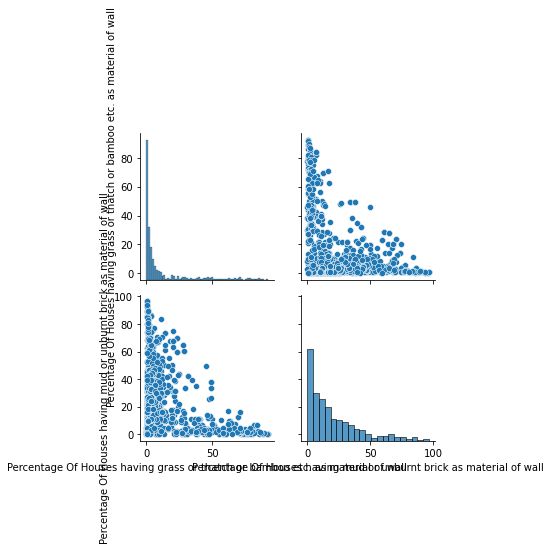

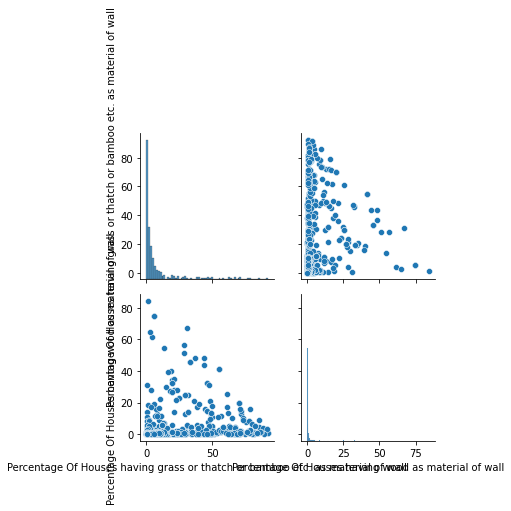

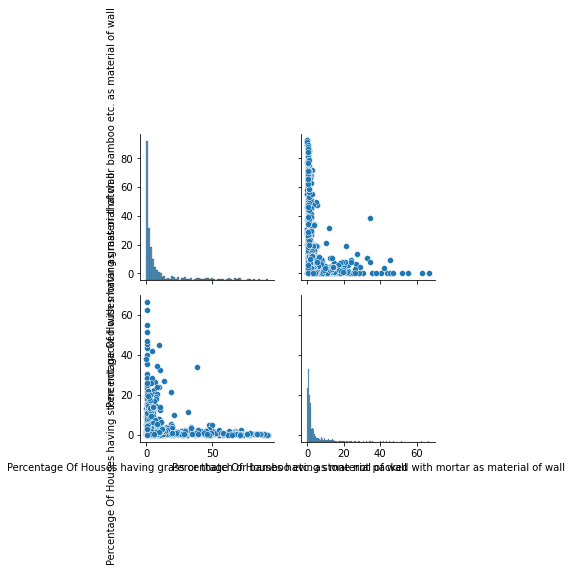

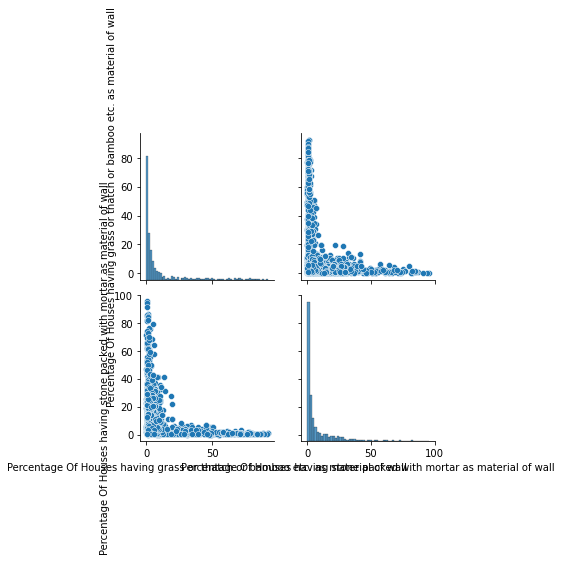

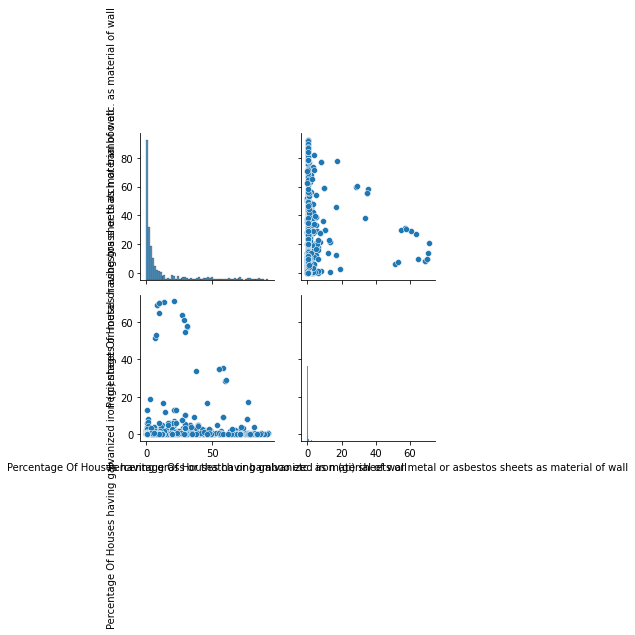

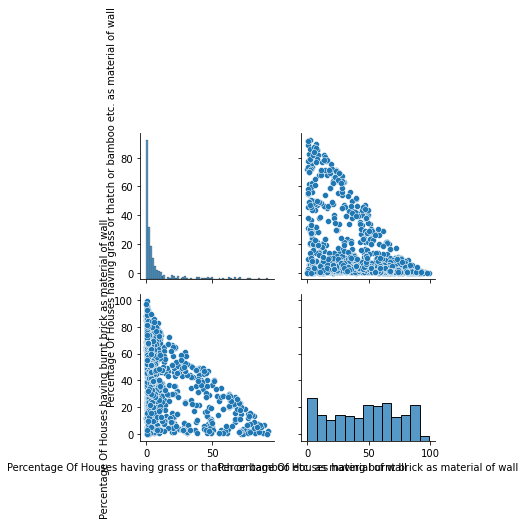

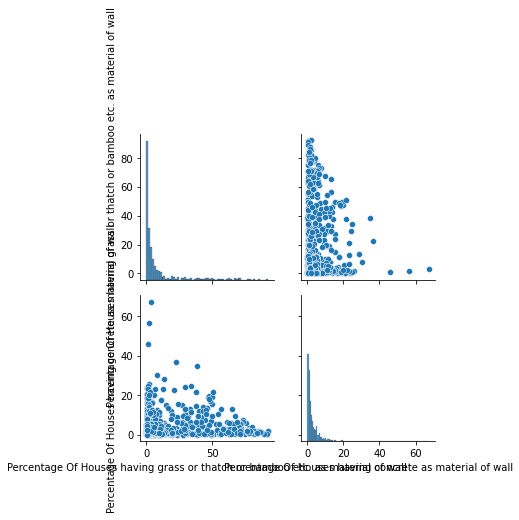

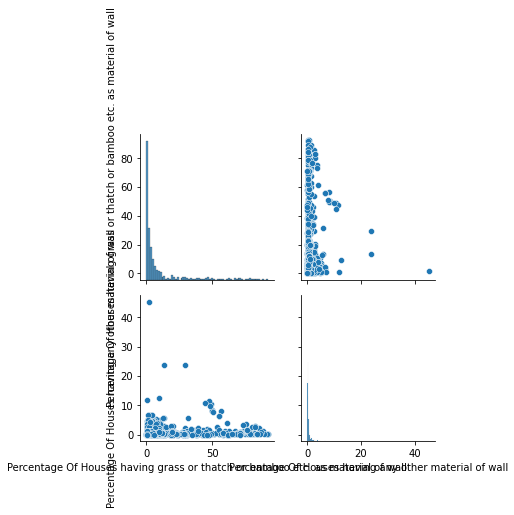

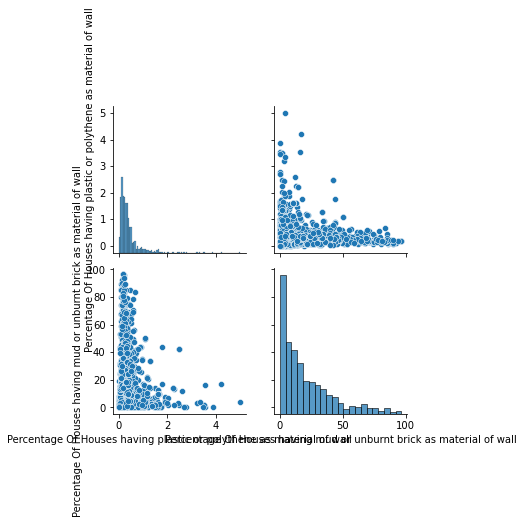

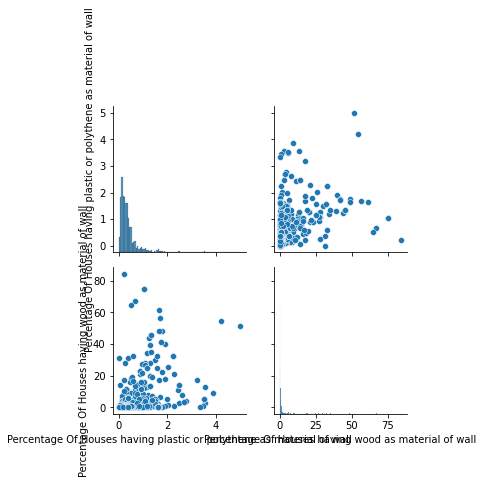

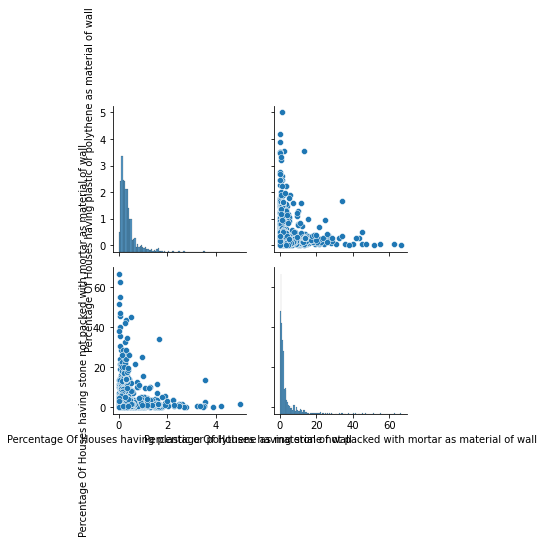

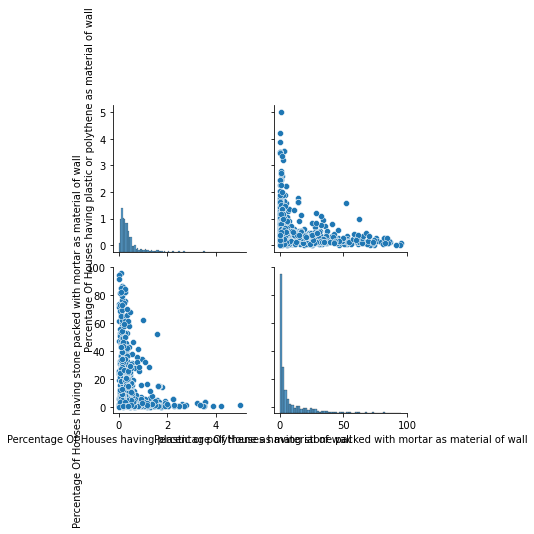

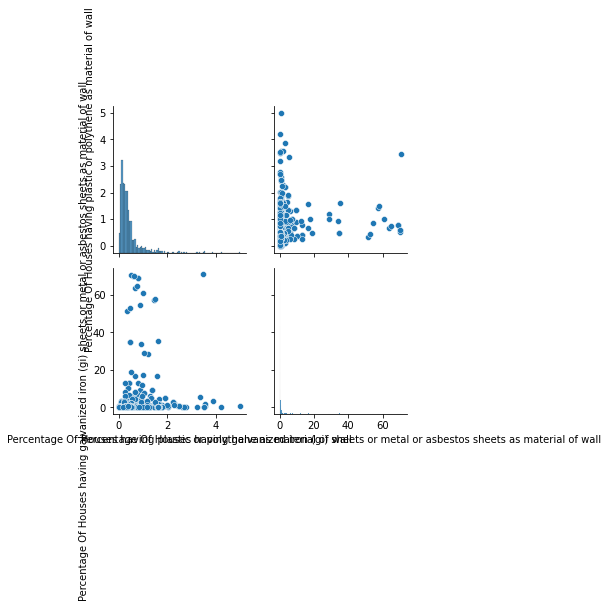

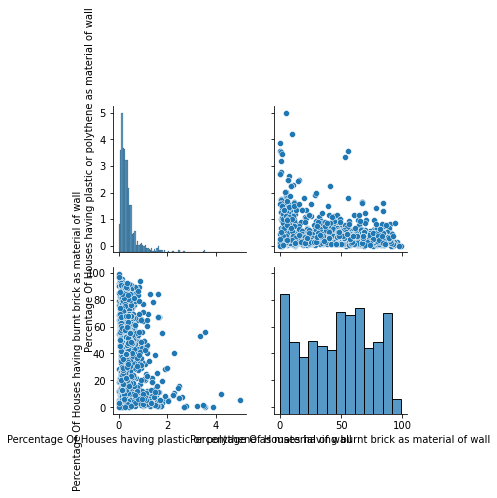

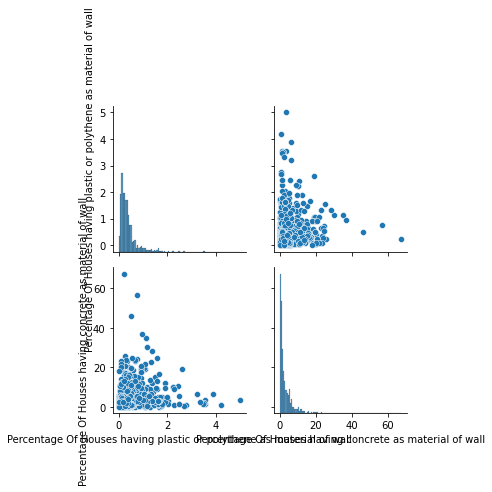

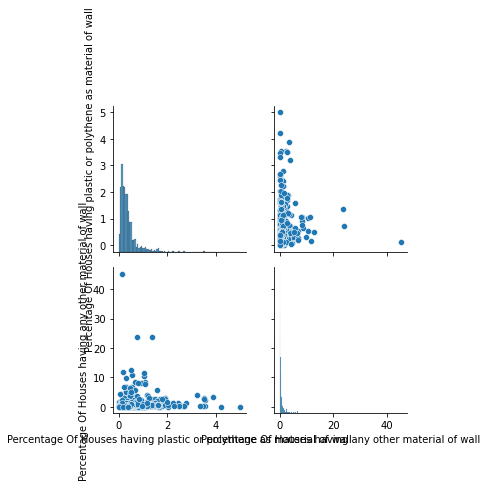

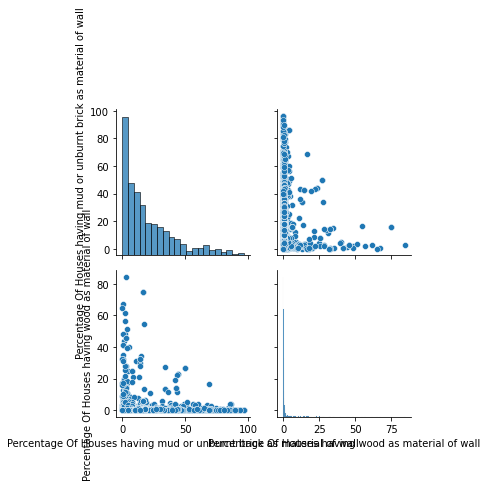

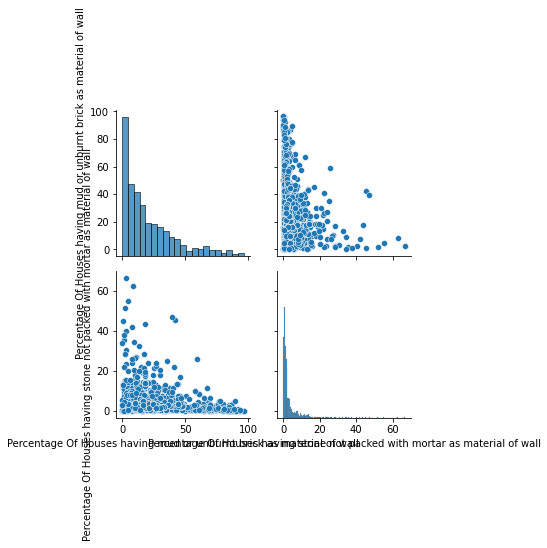

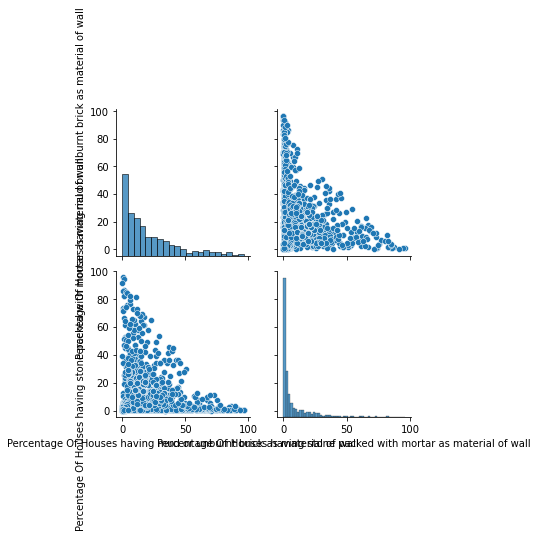

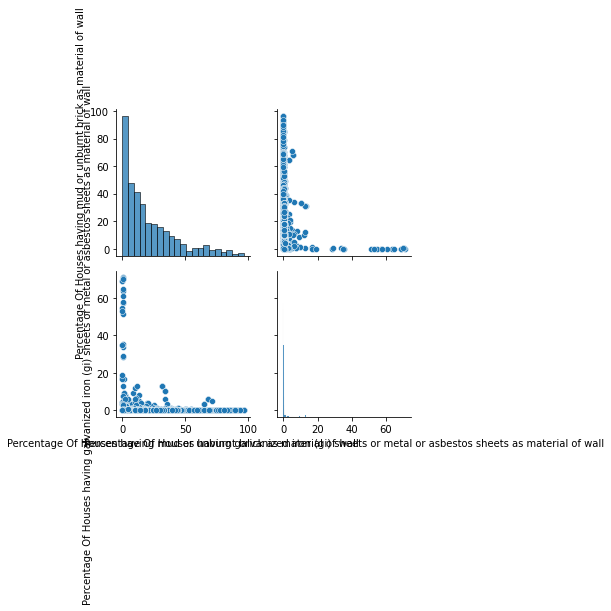

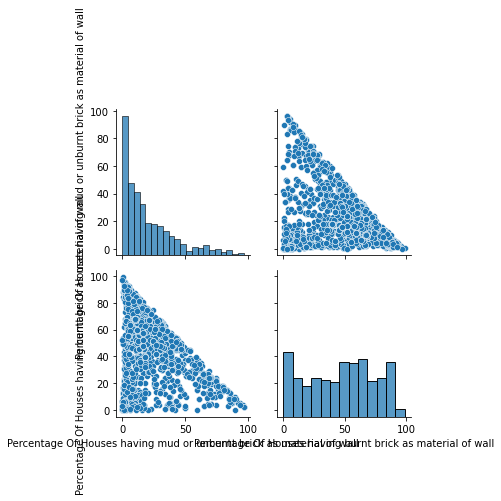

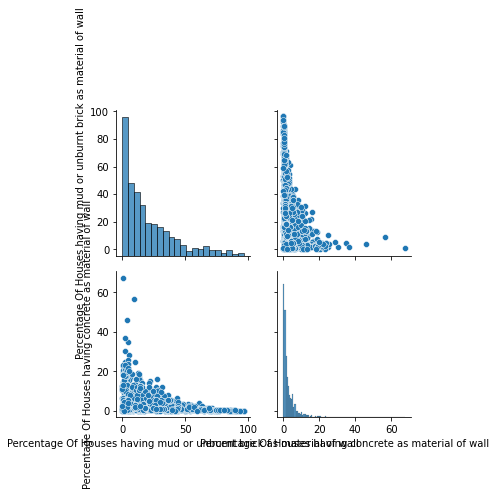

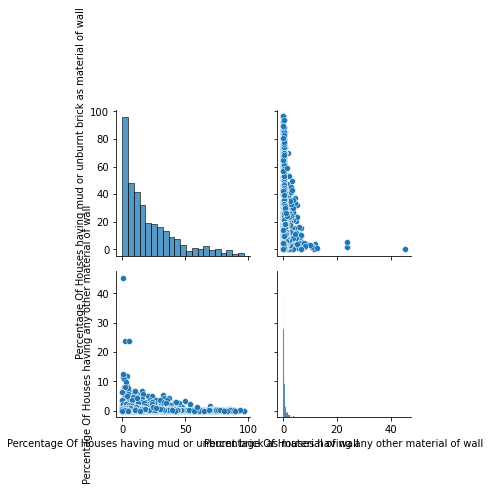

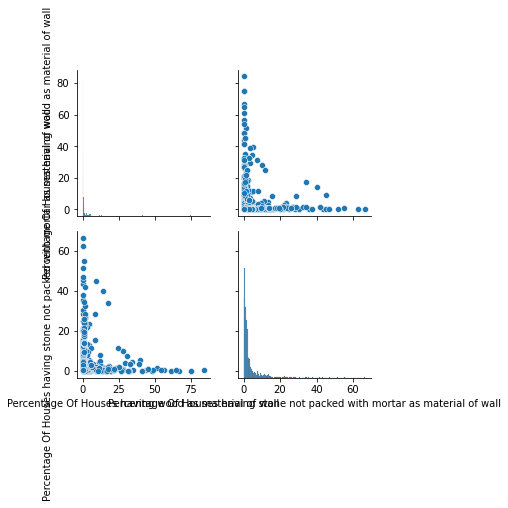

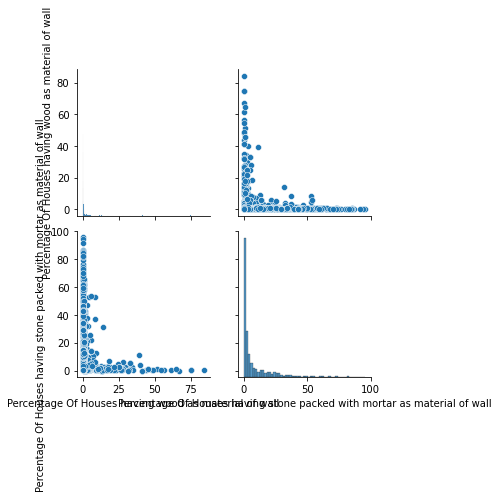

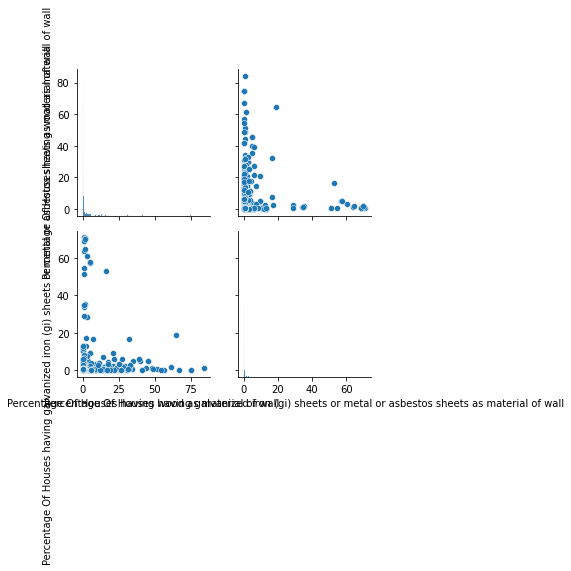

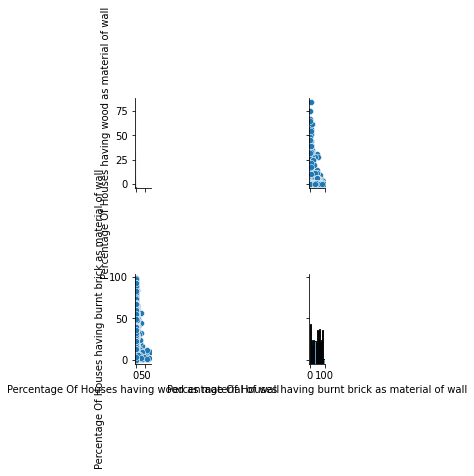

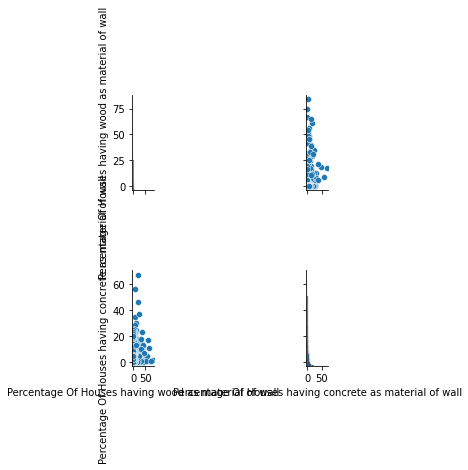

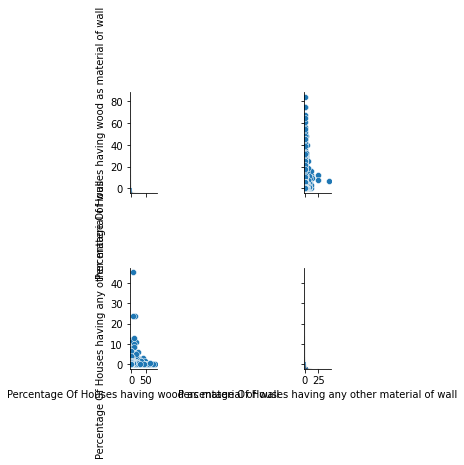

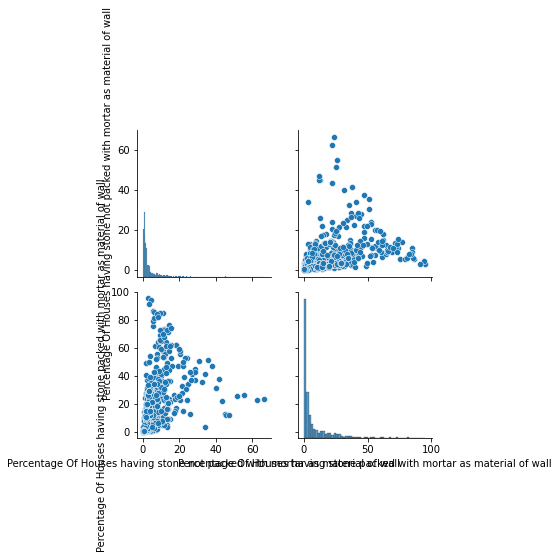

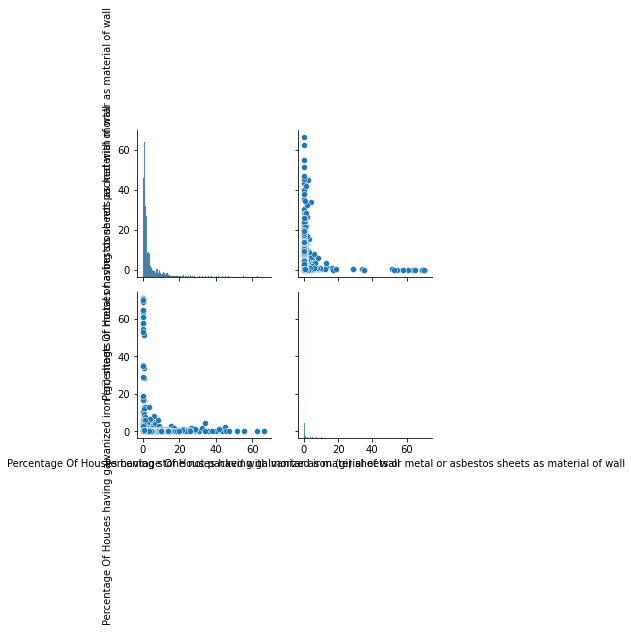

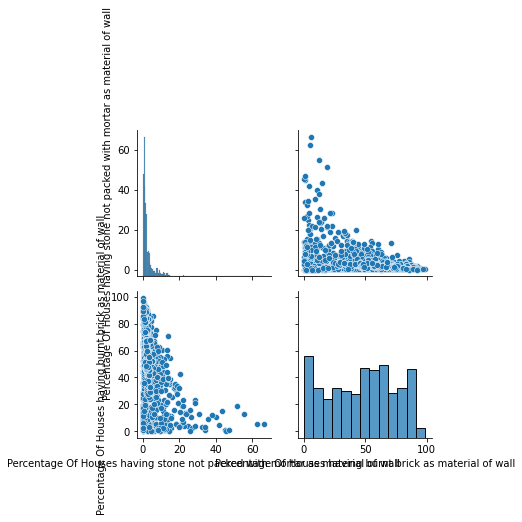

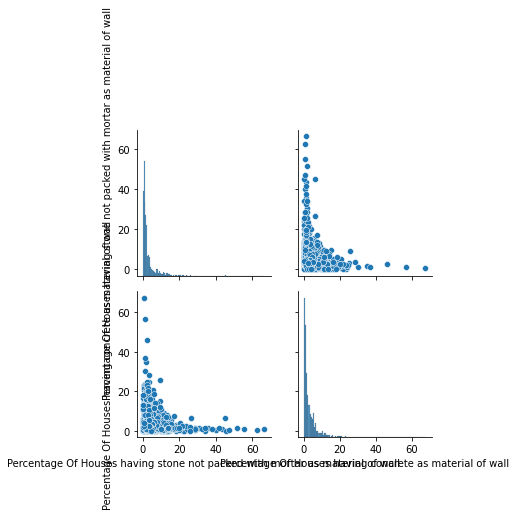

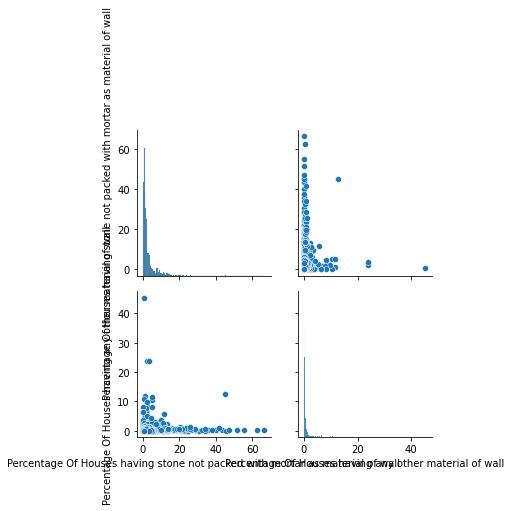

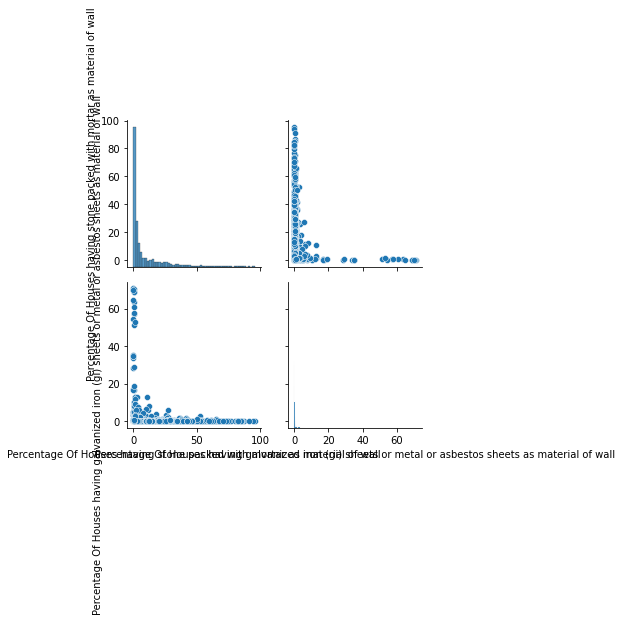

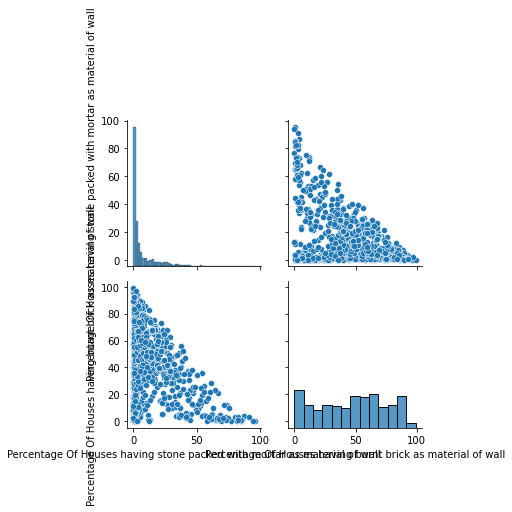

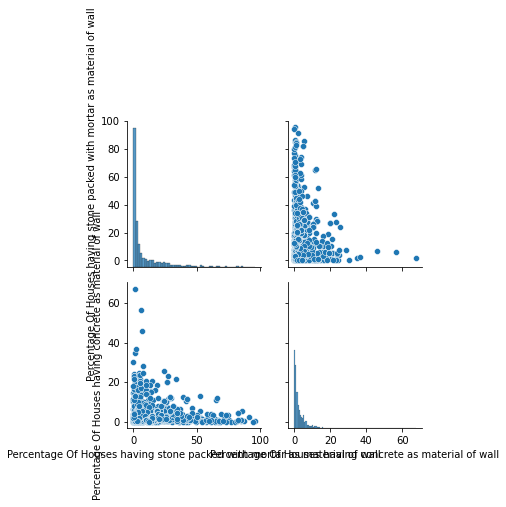

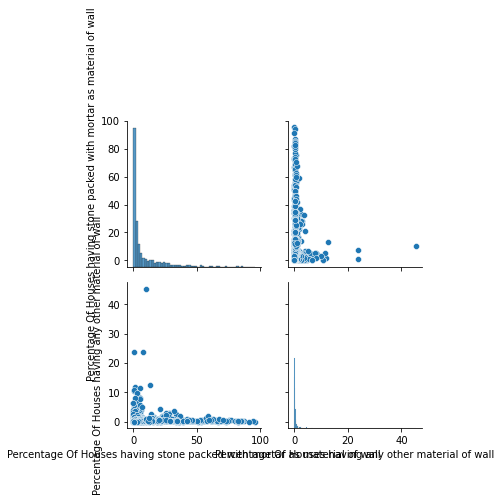

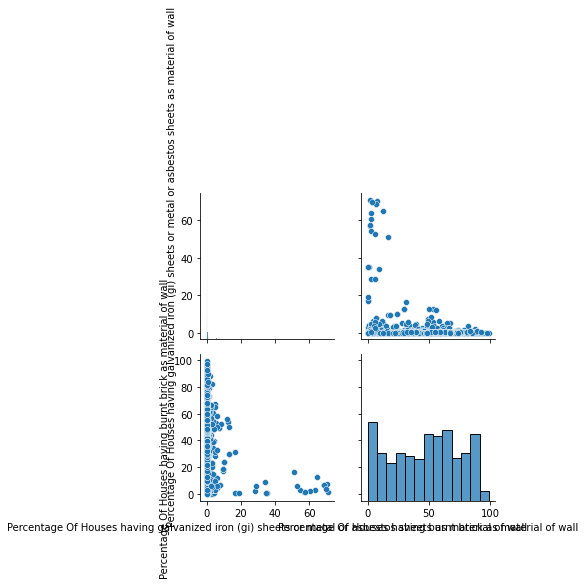

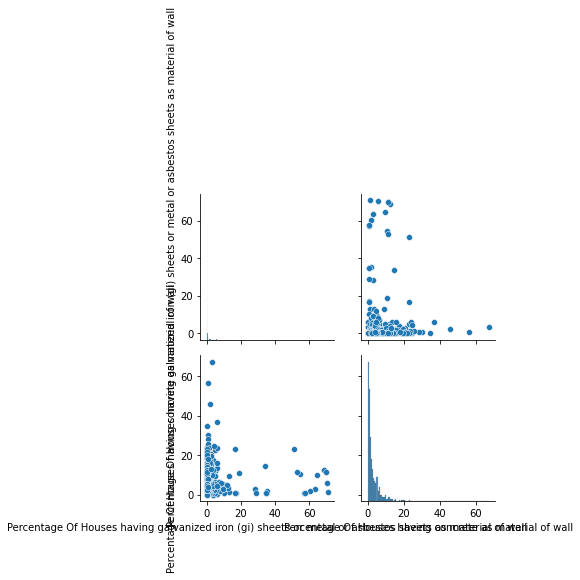

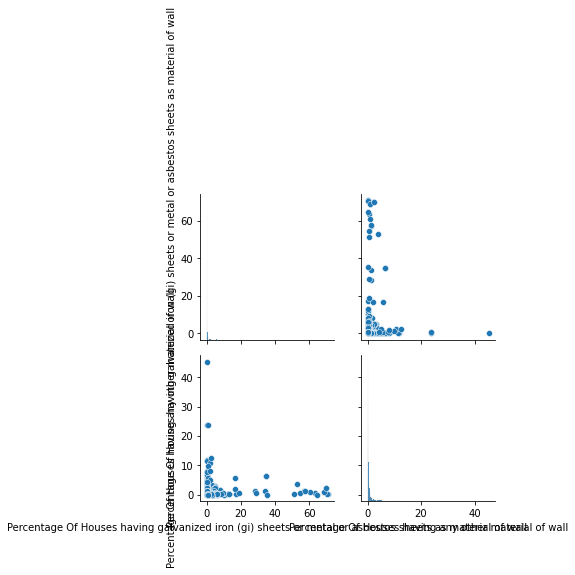

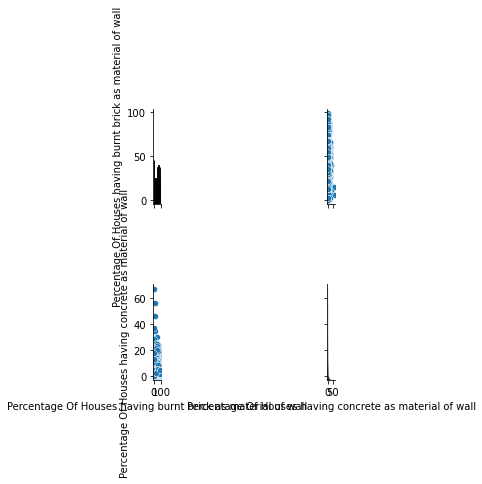

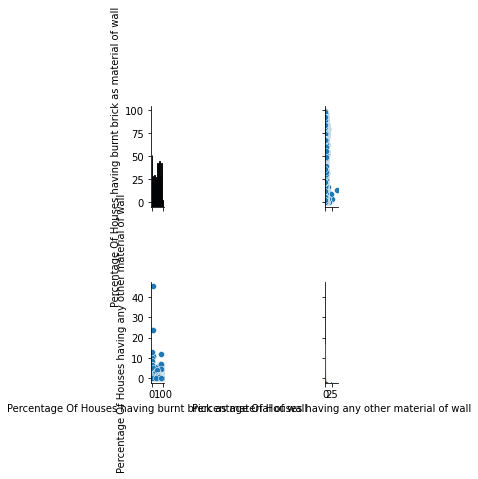

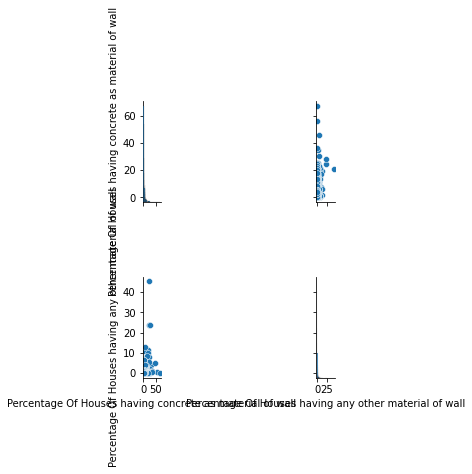

In [29]:
import warnings #ignoring warnings about ill fit chart
warnings.filterwarnings("ignore") #warnings ignored

for i in range(19,29):#Iterating the  percentage columns
    for j in range(i+1, 29): #iterating in pairs
        sns.pairplot(df[[df.columns[i], df.columns[j]]]) #Plotting pairplots for each column pair
        plt.show() #Displaying pairplots

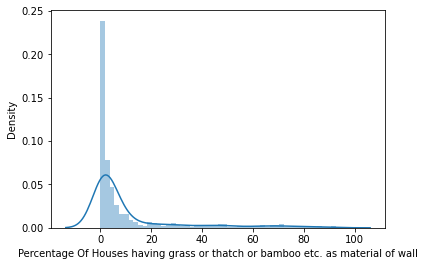

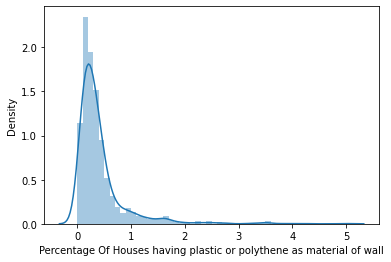

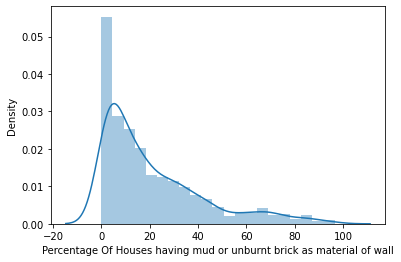

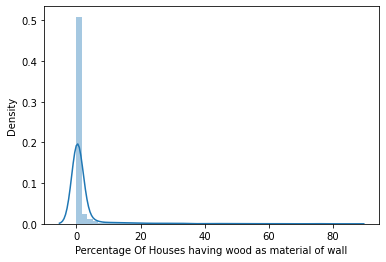

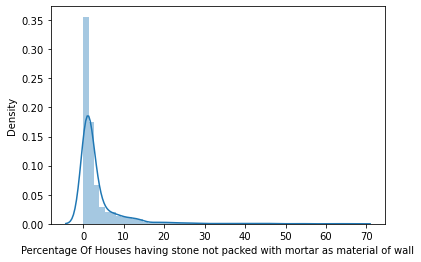

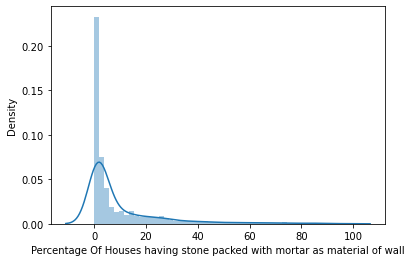

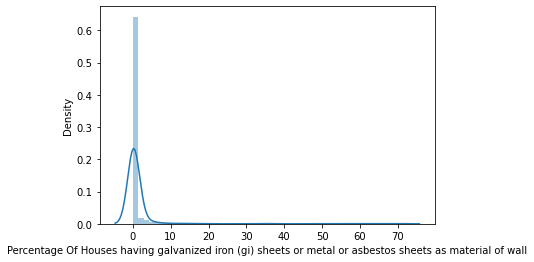

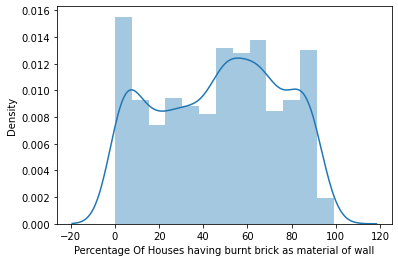

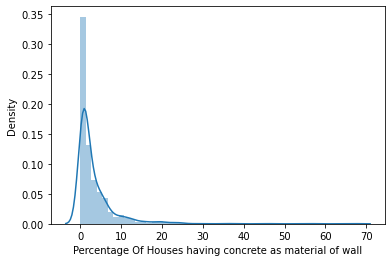

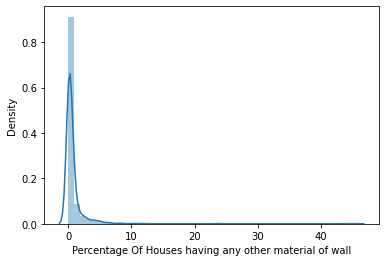

In [30]:
for i in range(19,29):#Iterating the new percentage columns
    sns.distplot(df[df.columns[i]]) #Plotting distplot for each column 
    plt.show() #Displaying distplots

References:

>Numpy Documentation : https://numpy.org/doc/

>Pandas Documentation : https://pandas.pydata.org/docs/

>Matplolib Documentation : https://matplotlib.org/stable/index.html

>Seaborn Documentation : https://seaborn.pydata.org/

>GeeksForGeeks : https://www.geeksforgeeks.org/exploratory-data-analysis-eda-types-and-tools/?ref=lbp

>Stack Exchange : https://datascience.stackexchange.com/

>W3Schools : https://www.w3schools.com/python/

>And a hell lot of google searches on random sites!

